In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import healpy as hp
%matplotlib inline

from pylab import cm

cmap = cm.jet
cmap.set_over(cmap(1.0))
cmap.set_under('w')
cmap.set_bad('gray')

import sys
import os

from urllib.request import urlretrieve,urlopen
from datetime import datetime

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('healpy version ' + hp.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
Numpy version 1.13.3
Pandas version 0.22.0
healpy version 1.11.0
Matplotlib version 2.1.2


In [2]:
df_gh_srz = pd.read_csv('df_tgas_hip_srez.csv',
                     #sep="\s+", 
                     #skiprows=1,
                     #usecols=[1,100],
                     #names=name_col
                    )

In [3]:
df_gh_srz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90283 entries, 0 to 90282
Data columns (total 69 columns):
Unnamed: 0                       90283 non-null int64
hip                              90283 non-null int64
tycho2_id                        0 non-null float64
solution_id                      90283 non-null int64
source_id                        90283 non-null int64
random_index                     90283 non-null int64
ref_epoch                        90283 non-null float64
ra                               90283 non-null float64
ra_error                         90283 non-null float64
dec                              90283 non-null float64
dec_error                        90283 non-null float64
parallax                         90283 non-null float64
parallax_error                   90283 non-null float64
pmra                             90283 non-null float64
pmra_error                       90283 non-null float64
pmdec                            90283 non-null float64
pmdec_err

In [4]:
[[df_gh_srz.ra.max(),df_gh_srz.ra.min()],
[df_gh_srz.l.max(),df_gh_srz.l.min()],
[df_gh_srz.ecl_lon.max(),df_gh_srz.ecl_lon.min()],
[df_gh_srz.dec.max(),df_gh_srz.dec.min()],
[df_gh_srz.b.max(),df_gh_srz.b.min()],
[df_gh_srz.ecl_lat.max(),df_gh_srz.ecl_lat.min()]]

[[179.99997189002639, -179.9952046997528],
 [179.99832093780174, -179.99995069177967],
 [179.99754803477452, -179.99969146506339],
 [89.569467052340485, -89.782381256822831],
 [89.894342605486912, -89.608066280847666],
 [89.482957764117202, -89.662232714280449]]

In [5]:
df_gh_srz['ra'] = df_gh_srz['ra'] + 180
df_gh_srz['dec'] = df_gh_srz['dec'] + 90

df_gh_srz['l'] = df_gh_srz['l'] + 180
df_gh_srz['b'] = df_gh_srz['b'] + 90

df_gh_srz['ecl_lon'] = df_gh_srz['ecl_lon'] + 180
df_gh_srz['ecl_lat'] = df_gh_srz['ecl_lat'] + 90

In [6]:
[[df_gh_srz.ra.max(),df_gh_srz.ra.min()],
[df_gh_srz.l.max(),df_gh_srz.l.min()],
[df_gh_srz.ecl_lon.max(),df_gh_srz.ecl_lon.min()],
[df_gh_srz.dec.max(),df_gh_srz.dec.min()],
[df_gh_srz.b.max(),df_gh_srz.b.min()],
[df_gh_srz.ecl_lat.max(),df_gh_srz.ecl_lat.min()]]

[[359.99997189002636, 0.0047953002471956552],
 [359.99832093780174, 4.9308220326338414e-05],
 [359.99754803477452, 0.0003085349366074297],
 [179.56946705234049, 0.21761874317716945],
 [179.89434260548691, 0.39193371915233399],
 [179.4829577641172, 0.33776728571955061]]

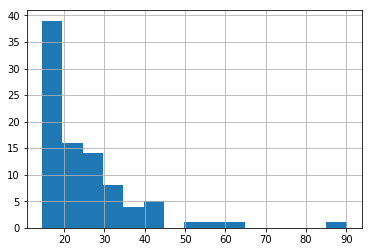

In [74]:
plt.hist(df_gh_srz[['hip','parallax','parallax_hip','parallax_difference','parallax_difference_abs','parallax_error','parallax_error_hip','nobs']].sort_values(
    by='parallax_difference_abs', ascending=False).head(90).parallax_difference_abs,bins=15)
plt.grid()

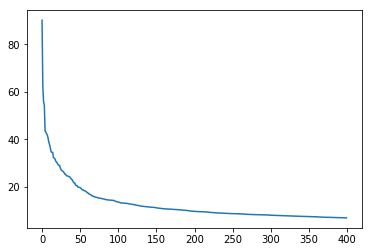

In [8]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:400],df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:400])

In [76]:
df_gh_srz[['hip','parallax','parallax_hip','parallax_difference','parallax_difference_abs','parallax_error','parallax_error_hip','nobs']].sort_values(
    by='parallax_difference_abs', ascending=False).head(92)

,hip,parallax,parallax_hip,parallax_difference,parallax_difference_abs,parallax_error,parallax_error_hip,nobs
16538,21000,3.613519,93.67,90.056481,90.056481,0.430925,7.62,41
32238,42525,5.939341,68.54,62.600659,62.600659,0.498971,15.51,88
89258,117081,7.767833,63.56,55.792167,55.792167,0.391416,21.02,52
69953,92059,1.025301,55.49,54.464699,54.464699,0.257513,13.48,74
12867,16582,3.352539,46.79,43.437461,43.437461,0.337983,47.48,78
37925,49971,10.032883,53.21,43.177117,43.177117,0.273956,17.78,79
10858,14101,148.510255,106.16,-42.350255,42.350255,0.941835,16.51,95
68772,90368,9.239326,51.00,41.760674,41.760674,0.238042,10.37,128
67064,87784,0.901640,41.30,40.398360,40.398360,0.261740,8.36,266
8599,11167,1.600522,40.32,38.719478,38.719478,0.361958,18.63,146


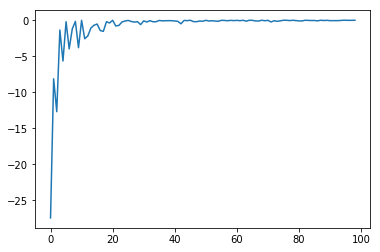

In [10]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:100-1],np.diff(df_gh_srz[df_gh_srz['parallax_difference']>3*df_gh_srz['parallax_error_hip_tgas']]['parallax_difference_abs'].sort_values(ascending=False)[:100]))

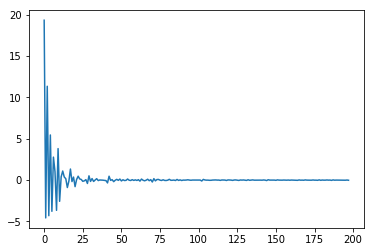

In [11]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:200-2],np.diff(np.diff(df_gh_srz[df_gh_srz['parallax_difference']>3*df_gh_srz['parallax_error_hip_tgas']]['parallax_difference_abs'].sort_values(ascending=False)[:200])))

1954
692 692


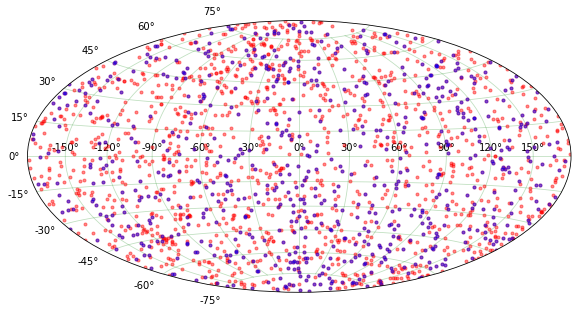

1954
692 692


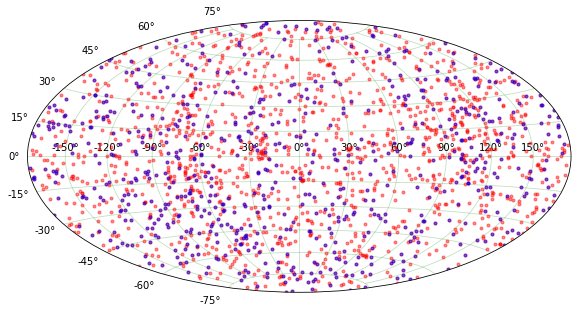

1954
692 692


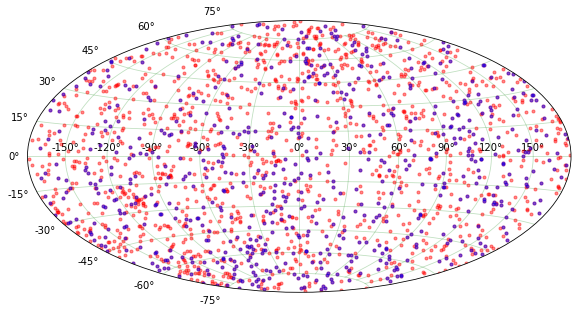

873
272 272


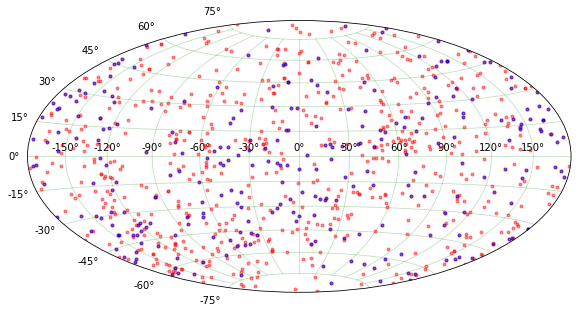

873
272 272


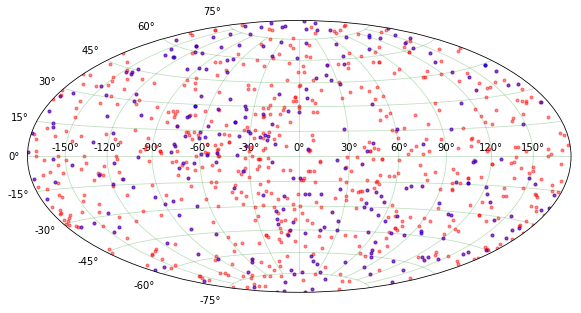

873
272 272


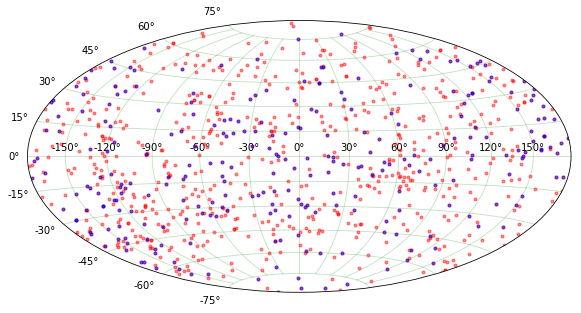

90
9 9


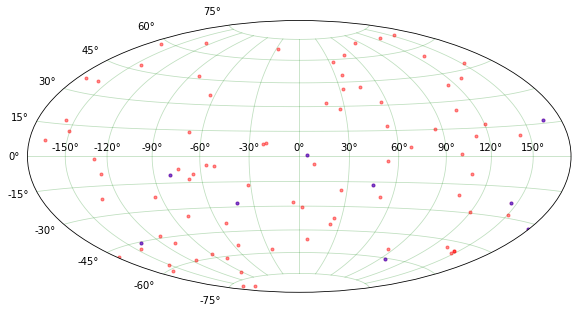

90
9 9


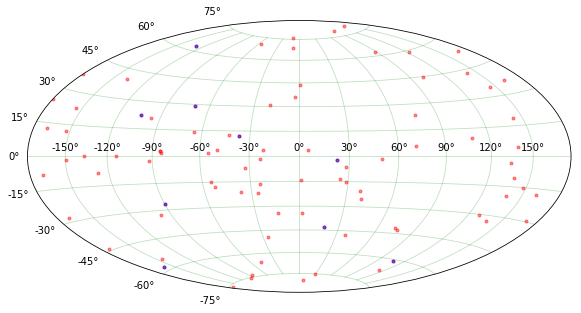

90
9 9


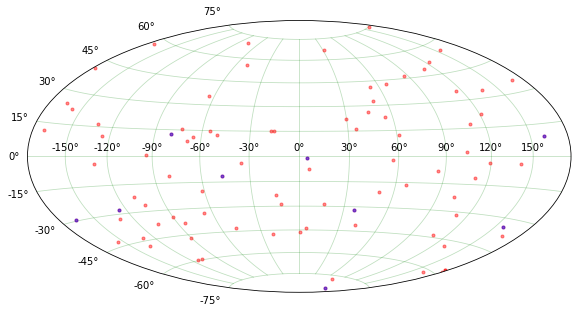

CPU times: user 3.43 s, sys: 16 ms, total: 3.44 s
Wall time: 3.42 s


In [63]:
%%time

def scattermy(df0,x,y,c,k='r.'):
    import matplotlib as mpl
    plt.figure(figsize=(10,5))
    ax = plt.subplot(111, projection = 'hammer')
    ax.set_facecolor('w')
    print(len(df0[x]))
    plt.plot(
        (df0[x]-180)*np.pi/180,
        (df0[y]-90)*np.pi/180, 
        k, 
        alpha=.45,
        #s = 1.05,
        #marker="o",
        #color = 1/(df0.max - df0.min) *(df0[c] - df0.min),
        #linewidths=2.01,
    )
    x1 = df0[df0[c]<0][x]
    y1 = df0[df0[c]<0][y]
    print(len(x1),len(y1))
    if (len(x1) and len(y1)):
        plt.plot(
            (x1-180)*np.pi/180,
            (y1-90)*np.pi/180, 
            'b.', 
            alpha=.45,
            #s = 1.05,
        #marker="o",
        #color = 1/(df0.max - df0.min) *(df0[c] - df0.min),
        #linewidths=2.01,
        )
    

    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    
    plt.grid(color='g',alpha = .25)#, linestyle='--', linewidth=1.9)
    plt.show()

#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ra','dec','parallax_difference_abs')
#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ra','dec','parallax_difference')

#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'l','b','parallax_difference_abs')
#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'l','b','parallax_difference')

#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ecl_lon','ecl_lat','parallax_difference_abs')

#scattermy(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']].sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ecl_lon','ecl_lat','parallax_difference')
#scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(75),'ecl_lon','ecl_lat','parallax_difference')

MMM_KEK = df_gh_srz['parallax_difference'].sum()/len(df_gh_srz['parallax_difference'])
DDD_KEK = np.sqrt(sum([np.power(i-MMM_KEK,2) for i in df_gh_srz['parallax_difference']])/len(df_gh_srz['parallax_difference']))

scattermy(df_gh_srz[np.abs(df_gh_srz['parallax_difference']) > 3. * df_gh_srz['parallax_error_hip_tgas']],'ra','dec','parallax_difference')
scattermy(df_gh_srz[np.abs(df_gh_srz['parallax_difference']) > 3. * df_gh_srz['parallax_error_hip_tgas']],'l','b','parallax_difference')
scattermy(df_gh_srz[np.abs(df_gh_srz['parallax_difference']) > 3. * df_gh_srz['parallax_error_hip_tgas']],'ecl_lon','ecl_lat','parallax_difference')

scattermy(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 3. * DDD_KEK],'ra','dec','parallax_difference')
scattermy(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 3. * DDD_KEK],'l','b','parallax_difference')
scattermy(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 3. * DDD_KEK],'ecl_lon','ecl_lat','parallax_difference')

scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(90),'ra','dec','parallax_difference')
scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(90),'l','b','parallax_difference')
scattermy(df_gh_srz.sort_values(by = 'parallax_difference_abs',ascending=False).head(90),'ecl_lon','ecl_lat','parallax_difference')


In [13]:
FACT = lambda N: 1 if ( N <= 1) else N*FACT(N-1) 

#np.float64(3.1415926535897932384626433832795),np.float128(np.pi)


from decimal import *
getcontext().prec = 20
PI = Decimal('3.1415926535897932384626433832795')




def FACT2(N1,N2):
# ! Произведение чисел от N1 до N2 
# INTEGER(4), INTENT(IN) :: N1,N2
# INTEGER(4) ::  I
    
    fact2 = 1
    for i in np.arange(N1, N2+1):
        fact2 = fact2*i
    return fact2 

In [14]:
def A(M,N,K):
    Up = 1.
    for i in np.arange(0,2*M):
        Up = Up * (N - K - i)
    
    Dn = 1.
    for i in np.arange(1,M+1):
        Dn = Dn * 2 * i * (2 * (N - i) + 1)
    #tosha^.^
    if (M % 2 == 0):
        return Up/Dn
    else:
        return -Up/Dn
    

def NORM(N,K):
    Up = 1.
    for i in np.arange(N+1,2*N+1):
        Up = Up * i
    Dn = 1.
    for i in np.arange(1, N-K+1):
        Dn = Dn * i
    
    Up = Up / Dn
    
    for i in np.arange(1, N+1):
        Up = Up * 0.5
    return Up

    
def PL(N,K,D):
#Присоединенный полином Лежанжра P_nk
#N,K  - Индексы полинома
#D    - Склонение или галактическая широта в градусах!'''
    if (N<K): return .0 
    
    D = D
#    X = np.sin(D)
#заменили - для случа, когда у нас D изменяется от 0 до pi, на этот отрезке sin(D), эевивалентно -cos(D)
    X = - np.cos(D)
    F = (N - K) / 2
    
    if (F == 0):
        Z = X **(N-K) * np.sqrt(1-X**2) ** K
    else:
        Z = X ** (N-K)
        for m in np.arange(1,F+1):
            Z = Z + A(m,N,K) * X**(N - K - 2*m)
        Z = Z * np.sqrt(1 - X ** 2) ** K
    return NORM(N,K)*Z


def INDEXJ(N,K,L):
    #Вычисление индекса J=N**2+2*K+L-1
    return N ** 2 + 2 * K + L-1

def INDEXES(J):
#Вычисление индексов N,K,L по индексу J (J=N**2+2*K+L-1)
    N = int(np.sqrt(J))
    K = J - N ** 2
    if (K % 2 == 0):
        L = 1
    else:
        L = 0
    K = (K - L + 1) / 2
    return N,int(K),int(L)

def FK(N,K,L,A,D):
#Ненормированная сферическая функция
    if (K == 0):
        return PL(N, 0, D)
    else:
        if (L == 0):
            return PL(N, K, D) * np.sin(K * A)
        else:
            return PL(N, K, D) * np.cos(K * A)
        
        
def FR(N,K):
#! Норма сферической функции
    fr = np.sqrt((2*N+1)/(4.*np.float64(PI)))
    if (K > 0):
        fr=fr*np.sqrt(2.0/FACT2(N-K+1,N+K))
    return fr
    
    
    
    
def FV(N,K,L,A,D):
# ! Нормированная сферическая функция
#INTEGER, INTENT (IN) :: N,K,L
#REAL(8), INTENT (IN) :: A,D ! В градусах
    return FR(N,K) * FK(N,K,L,A,D)

def FVJ(J,A,D):
# ! Нормированная сферическая функция от одного индекса
# INTEGER, INTENT (IN) :: J
# REAL(8), INTENT (IN) :: A,D ! В градусах
#широта (0 -180) b theta, dec, lat
#долгота (0 - 360) l phi, ra, lon
    N,K,L = INDEXES(J)
    return FV(N,K,L,A,D)

In [60]:
NSIDE = 10
sfet_f_n = 49
nside_a_n = NSIDE**2 * 12


n_array_nside = np.arange(hp.nside2npix(NSIDE))

############################################################
##########           vizualization sf
############################################################

def madj(Z):
    M = sum(Z)/len(Z)
    M
    d0 = .0
    for i in Z:
        d0 += np.power((i - M),2)
    return np.sqrt(d0/len(Z)),M

#madj(X0[0]),madj(X1[0]),madj(X2[0][1:])
#X0[1]/nside_a_n,X1[1]/nside_a_n,X2[1]/nside_a_n,


def mapp(Zmap):
    kmapp_0 = np.zeros(nside_a_n)
    for i in [n_array_nside]:
        lib, lil  = list(hp.pix2ang(NSIDE, i))
        for j in np.arange(sfet_f_n):
            kmapp_0[i] += Zmap[j] * FVJ(j, lil,lib)
    return kmapp_0


def mappj(j):
    nsidesub = 32
    nside_a_n_sub = nsidesub**2*12
    kmapp_0 = np.zeros(nside_a_n_sub)
    for i in np.arange(nside_a_n_sub):
        lib, lil  = list(hp.pix2ang(nsidesub, i))
        kmapp_0[i] = FVJ(j, lil,lib)
    return kmapp_0

def mappj_val0(j):
    lib, lil  = list(hp.pix2ang(NSIDE, int(nside_a_n/2)))
    return FVJ(j, lil,lib)

def print_sf(n):
    for j_sf in np.arange(0,n):
        indexsej0,indexsej1,indexsej2 = INDEXES(j_sf)
        titles =  'j='+str(j_sf) + ' (n={}, k={}, l={})'.format(indexsej0,indexsej1,indexsej2)
        mapppj = mappj(j_sf)

        hp.mollview(mapppj,title =titles,unit='',xsize = 800,cmap='seismic')
        
        
#######################################################################
##########              end vizualization sf
#######################################################################

ii = lambda b,l: hp.ang2pix(NSIDE,b/180*np.pi,l/180*np.pi)

def get_Y(df_gh_srz,arg_l = 'l', arg_b = 'b', arg_summ = '',for_y = np.mean):
    Ny_ = np.zeros(nside_a_n)
    Y_ = [[] for i in np.arange(nside_a_n)]
    for i in ii(df_gh_srz[arg_b],df_gh_srz[arg_l]):
        Ny_[i] += 1
    print('min_ns={}\tmax_ns={}\t'.format(min(Ny_),max(Ny_)),end='') #nmin_n_in_sector max_n_in_sector
    
    #print('d={},\tM={},\tD={}'.format(d[0],MMM(Zx[0]),DDD(Zx[0])))
    

    for i,rm in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_summ]):
        Y_[i].append(rm)
        #Y_[i] += rm
    Y__ = [ for_y(Y_[i]) if (Ny_[i] > 0) else .0 for i in np.arange(nside_a_n)]
    print(for_y)
    return Y__ #/ max(Y__)

def get_a(df_gh_srz,arg_l0,arg_b0,cintro_m=False,arg_m = '',arg_y = '',for_y=np.mean):
    
    def get_lb(df_gh_srz,arg_l = 'l', arg_b = 'b',arg_m=''):
        Nl_ = [[] for i in np.arange(nside_a_n)]
        ll_ = [[] for i in np.arange(nside_a_n)]
        bb_ = [[] for i in np.arange(nside_a_n)]
        mm_ = [[] for i in np.arange(nside_a_n)]
        kl12 = [0 for i in np.arange(nside_a_n)]
        lb12 = [0 for i in np.arange(nside_a_n)]
        
        
        if (arg_m == ''):
            arg_m = arg_l
        for i,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_m]):
            if (arg_m == arg_l):
                m_ = 1
            Nl_[i].append(np.abs(m_))
        for i,rm1,rm2,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b],df_gh_srz[arg_m]):
            if (arg_m == arg_l):
                m_ = 1
            ll_[i].append(rm1)
            bb_[i].append(rm2)
            mm_[i].append(m_)
            
        for i in np.arange(nside_a_n):
            if len(ll_[i])>1 and max(ll_[i]) - min (ll_[i]) > 181:
                ll_[i] = [j if (j<180) else j-360 for j in ll_[i]]
                #print(i,max(ll_[i]),min(ll_[i]), end=' ')
                #klsum_ = np.dot(ll_[i],mm_[i])
                #kl12_ = (klsum_/sum(Nl_[i])/180)*np.pi
                #if (kl12_ < 0):
                #    kl12_ += 2*np.pi
                #print(kl12_*180/np.pi if (kl12_*180/np.pi < 360) else (kl12_*180/np.pi,'FFFFFFFFF'))
        
        for i in np.arange(nside_a_n):
            klsum = np.dot(ll_[i],mm_[i])
            kl12[i] = (klsum/sum(Nl_[i])/180)*np.pi
            if (kl12[i] < 0):
                kl12[i] += 2*np.pi
                
            lbsum = np.dot(bb_[i],mm_[i])
            lb12[i] = (lbsum/sum(Nl_[i])/180)*np.pi
            #print(i,kl12[i],lb12[i])
            
        return kl12, lb12
                
        
    '''     
        Nl_ = np.zeros(nside_a_n)
        ll_ = np.zeros(nside_a_n)
        bb_ = np.zeros(nside_a_n)

        if (arg_m != ''):
            #print('|arg_m != ""',end='')
            for i,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_m]):
                Nl_[i] += np.abs(m_)
            for i,rm1,rm2,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b],df_gh_srz[arg_m]):
                ll_[i] += rm1*m_
                bb_[i] += rm2*m_
        else:
            for i in ii(df_gh_srz[arg_b],df_gh_srz[arg_l]):
                Nl_[i] += 1
            for i,rm1,rm2 in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b]):
                ll_[i] += rm1
                bb_[i] += rm2
        
        #for i,j,kl,kb,kn,ij in zip(ll_ / Nl_,bb_ / Nl_,ll_ ,bb_ , Nl_,[i for i in np.arange(len(Nl_))]):
            #if (np.abs(i) > 180 or np.abs(j) > 180):
                #print('\nlb:',ij,i,j,kl,kb,kn)
        return (ll_ / Nl_ /180)*np.pi, (bb_ / Nl_/180)*np.pi'''
    
   

    
    get_dif_l = lambda x,y: min((x-y)%(2*np.pi),-(x-y)%(2*np.pi))
    get_dif_b = lambda x,y: min((x-y)%np.pi,-(x-y)%np.pi)
    
    Am = np.zeros((nside_a_n, sfet_f_n))
    
    if (cintro_m == True):
        print("|cintro_m= True",end='')
        arg_l,arg_b = get_lb(df_gh_srz,arg_l0,arg_b0,arg_m)
        maxl,maxb=.0,.0
        for i in n_array_nside:
            get_b, get_l  = list(hp.pix2ang(NSIDE, i))
            #print(i, get_l,get_b)
            if ((get_dif_b(get_b,arg_b[i]) > maxb) or (get_dif_l(get_l,arg_l[i]) > maxl)):
                #print(arg_l[i],arg_b[i],round(get_dif_l(get_l,arg_l[i]),2),round(get_dif_b(get_b,arg_b[i]),2))
                maxb,maxl=max(get_dif_b(get_b,arg_b[i]),maxb),max(get_dif_l(get_l, arg_l[i]),maxl)
                print('\r({},{})\tmax_dl={}\tmax_db={}\t'.format(arg_l0[-3:],arg_b0[-3:],round(maxl*180/np.pi,2),round(maxb*180/np.pi,2)),end='')
                #print(get_l,arg_l[i],maxl, get_b,arg_b[i], maxb)
            for j in np.arange(sfet_f_n):
                Am[i][j] = FVJ(j, arg_l[i],arg_b[i])
    else:
        for i in n_array_nside:
            get_b, get_l  = list(hp.pix2ang(NSIDE, i))
            for j in np.arange(sfet_f_n):
                Am[i][j] = FVJ(j, get_l,get_b)
    #print('\t| Am creat.', end='')
    
    Y = get_Y(df_gh_srz,arg_l0, arg_b0, arg_y,for_y)
    #print('| Y creat.', end='')
    print()
    return Am, Y

MMM = lambda x: sum(x)/len(x)
DDD = lambda x: np.sqrt(sum([np.power(i-MMM(x),2) for i in x])/len(x))

def statis(Zx,d):
    print('+'*80)
    #print('d={},\tM={},\tD={}'.format(d[0],MMM(Zx[0]),DDD(Zx[0])))
    ink = []
    for k in np.arange(len(Zx)):
        if (np.abs(Zx[k]) > 3* d[k]):
            ink.append(k)
            print('j =',k,round(Zx[k],4),sep='\t')
    return ink

def get_healpix_sf(X_,Y_,k_):
    ert = np.zeros(sfet_f_n)
    for i in k_:
        ert[i]=X_[i]

    #hp.mollview(mapp(X_[0]),title = 'sf',unit='opromin op',xsize = 1200,cmap='jet')
    hp.mollview(np.array(Y_),title = '',unit='mas',xsize = 800,cmap='jet')
    hp.mollview(mapp(ert),title = '{}'.format(k_),unit='mas',xsize = 800,cmap='jet')
    #hp.mollview(np.array(Y2)-mapp(X2[0]),title = 'Y- sf',unit='opromin op',xsize = 1200, cmap='jet')
    from scipy.stats import linregress
    
    
    b = np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','parallax_difference_abs'))
    print('parallax_difference_abs',linregress(mapp(ert),b))
    b = np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','parallax_error_hip_tgas'))
    print('parallax_error_hip_tgas',linregress(mapp(ert),b))
    b = np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','nobs'))
    print('nobs',linregress(mapp(ert),b))
    
    
    plt.figure(figsize=(10,6))
    xx = [ i for i in np.arange(sfet_f_n)]
    markerline, stemlines, baseline = plt.stem(xx, X_, '--')
    plt.setp(baseline, 'color', 'k', 'linewidth', 2)
    plt.xlabel('Номер гармоники')
    plt.ylabel('Значение гармоники, mas')
    #plt.plot(xx,[MMM(X_[0]) for i in xx],'--',color='r')
    #plt.plot(xx,[MMM(X_[0])+DDD(X_[0]) for i in xx],':',color='r')
    #plt.plot(xx,[MMM(X_[0])-DDD(X_[0]) for i in xx],':',color='r')
    plt.grid()
    plt.show()

    

def get_LSQM(A,Y):
    w = np.ones(sfet_f_n)

    f = open('a.in', 'w')

    straa=''
    for i in np.arange(sfet_f_n):
        for j in n_array_nside:
            straa +=str(A[j][i])
            if j!=1199:
                straa +=' '
        straa +='\n'
        
    f.write(straa)
    f.close
    
    f2 = open('y.in', 'w')
    stry = [str(Y[j])+'\n' for j in n_array_nside]
    strm = ''
    for i in stry:
        strm +=i
    f2.write(strm)
    
    f2.close
    
    !gfortran Lsq.f90 main_lsq.f90
    !./a.out 
    f3 = open('x.out', 'r')
    x = np.float64(f3.readline().strip().split())
    f4 = open('d.out', 'r')
    d = np.float64(f4.readline().strip().split())
    return x,d

def get_sf_gr(df_gh_srz,cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0 = 'parallax_difference_abs' ,for_y=np.mean):
    print('\ncintro_m="{}", arg_m="{}", arg_y="{}"'.format(cintro_m0,arg_m0,arg_y0))
    print('(ra,dec): ', end='')
    Am0 ,Y0= get_a(df_gh_srz,'ra','dec',cintro_m0,arg_m0,arg_y0,for_y)
    X0,d0 = get_LSQM(Am0,Y0)
    
    X00 = list(X0/np.sum(np.abs(X0)))
    xk0 = np.sum(np.abs(X0))
    
    #print('\tget_sf_gr: done')
    
    print('(l,b):    ', end='')
    Am1 ,Y1= get_a(df_gh_srz,'l','b',cintro_m0,arg_m0,arg_y0,for_y)
    X1,d1 = get_LSQM(Am1,Y1)
    #print('\tget_sf_gr: done')
    
    X10 = list(X1/np.sum(np.abs(X1)))
    xk1 = np.sum(np.abs(X1))
    
    print('(lon,lat):', end='')
    Am2 ,Y2= get_a(df_gh_srz,'ecl_lon','ecl_lat',cintro_m0,arg_m0,arg_y0,for_y)
    X2,d2 = get_LSQM(Am2,Y2)
    #print('\tget_sf_gr: done')
        
    X20 = list(X2/np.sum(np.abs(X2)))
    xk2 = np.sum(np.abs(X2))
    
    print('#'*80)
    print('kx0 = {}\nkx1 = {}\nkx2 = {}\n'.format(xk0,xk1,xk2))
    print('#'*80)
    
    k0 = statis(X0,d0)
    k1 = statis(X1,d1)
    k2 = statis(X2,d2)
    #d2 = 0# X20[1][0]/nside_a_n
    #plt.figure(figsize=(20,9))
    #colors = ['blue','green','red']
    #labels = ['ra,dec','l,b','lon,lat']
    #xx = [ i for i in np.arange(sfet_f_n)]
    #plt.hist([xx,xx,xx], sfet_f_n, weights = [X00[0],X10[0],X20[0]],histtype='bar', color=colors, label=labels)
    #import matplotlib.lines as pltln
    #pltln.Line2D([0,sfet_f_n],[M0,M0+1],lw=5,ls='--',color=colors[0])
    #plt.plot(xx,[M0 for i in xx],'-',color=colors[0])
    #plt.plot(xx,[M1 for i in xx],'-',color=colors[1])
    #plt.plot(xx,[M2 for i in xx],'-',color=colors[2])
    #plt.plot(xx,[M0+D1 for i in xx],'-.',color=colors[0])
    #plt.plot(xx,[M1+D1 for i in xx],'-.',color=colors[1])
    #plt.plot(xx,[M2+D2 for i in xx],'-.',color=colors[2])
    #plt.plot(xx,[M0-D0 for i in xx],'-.',color=colors[0])
    #plt.plot(xx,[M1-D1 for i in xx],'-.',color=colors[1])
    #plt.plot(xx,[M2-D2 for i in xx],'-.',color=colors[2])
    #plt.legend(prop={'size': 10})
    #plt.grid()
    
    if (len(k0)>1):
        print('get_healpix:k={}, (ra,dec)'.format(len(k0)))
        get_healpix_sf(X0,Y0,k0)
    if (len(k1)>1):
        print('get_healpix:k={}, (l,b)'.format(len(k1)))
        get_healpix_sf(X1,Y1,k1)
    if (len(k2)>1):
        print('get_healpix:k={}, (ecl_lon,ecl_lat)'.format(len(k2)))
        get_healpix_sf(X2,Y2,k2)
    
    def vizual_data(P):
        P0,P1,P2 = P
        d0,k0,X0 = P0[0],P0[1],P0[2]
        d1,k1,X1 = P1[0],P1[1],P1[2]
        d2,k2,X2 = P2[0],P2[1],P2[2]
        print('#'*80)
        print('d:\t{}\t{}\t{}'.format(round(d0[0],4), round(d1[0],4), round(d2[0],4)))
        print('k:\t{}\t{}\t{}'.format(k0,k1, k2))
        print('#'*80),
        print('id__\tra,dec\ts_rd\t__l,b__\ts_rd\tlon,lat\ts_ll\t')
        print('='*80)
        for i in np.arange(len(X2)):
            print('{} &{} &{} &{} &{} &{} &{}\\\\'.format(i,round(X0[i],4),round(d0[i],4),round(X1[i],4),round(d1[i],4),round(X2[i],4),round(d2[i],4)))
            #print('{} &{} &{} \\\\'.format(i,round(X2[i],4),round(D2,4)))
        print('#'*80)
        
    
    vizual_data([[d0,k0,X0],[d1,k1,X1],[d2,k2,X2]])
    #vizual_data([d2,k2,X2])
    #return [[d0,M0,D0,k0,X00[0],xk0],[d1,M1,D1,k1,X10[0],xk1],[d2,M2,D2,k2,X20[0],xk2]]


cintro_m="False", arg_m="parallax_difference_abs", arg_y="parallax_difference_abs"
(ra,dec): min_ns=31.0	max_ns=170.0	<function median at 0x7f4a2c13fd08>

(l,b):    min_ns=31.0	max_ns=174.0	<function median at 0x7f4a2c13fd08>

(lon,lat):min_ns=35.0	max_ns=169.0	<function median at 0x7f4a2c13fd08>

################################################################################
kx0 = 4.570903083071723
kx1 = 4.556473870238839
kx2 = 4.429549107219639

################################################################################
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
j =	0	2.8959
j =	2	0.0425
j =	4	-0.3086
j =	5	-0.2963
j =	6	0.0758
j =	7	0.1118
j =	8	0.0547
j =	17	-0.0566
j =	21	0.0405
j =	23	-0.0517
j =	24	-0.0586
j =	47	-0.0402
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
j =	0	2.8975
j =	3	-0.0405
j =	4	0.1275
j =	5	0.2361
j =	6	-0.088
j =	8	0.3507
j =	17	-0.0433
j =	20	0.0722
j =	21	-0.0566
j =	44	0.0453

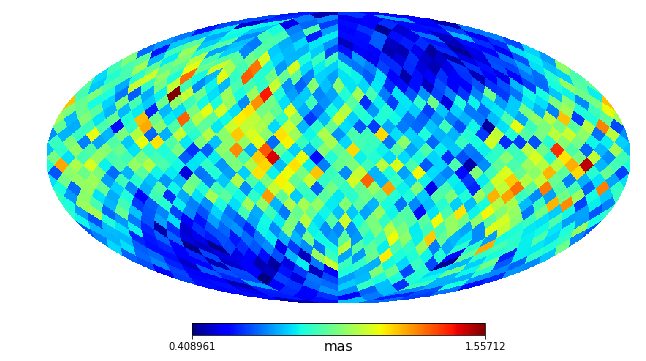

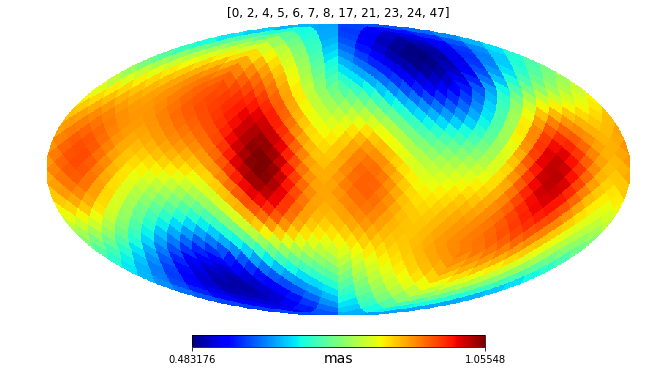

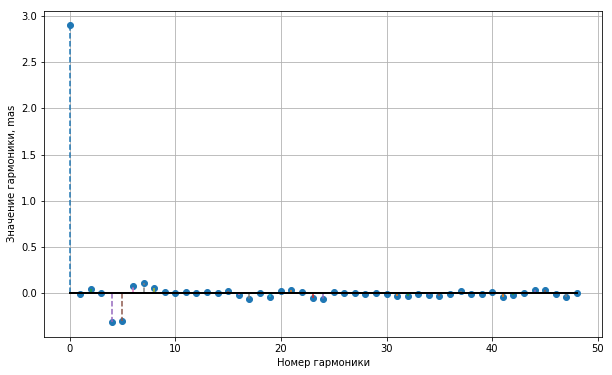

get_healpix:k=10, (l,b)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_difference_abs LinregressResult(slope=-0.47406587205473616, intercept=1.4756517021485118, rvalue=-0.25203135511163427, pvalue=7.6497141546453374e-19, stderr=0.052590222340164923)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_error_hip_tgas LinregressResult(slope=-0.52045395978012743, intercept=1.5696277190896937, rvalue=-0.30421786262977846, pvalue=4.0943533844754513e-27, stderr=0.047084819174973556)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
nobs LinregressResult(slope=49.429274867835659, intercept=72.101327166199908, rvalue=0.1875788573707185, pvalue=5.7780994887573888e-11, stderr=7.4781432715510601)


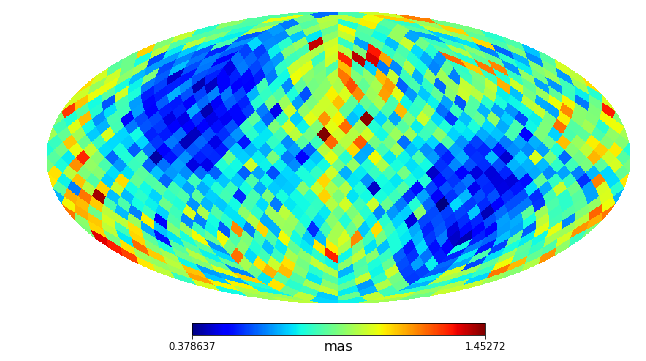

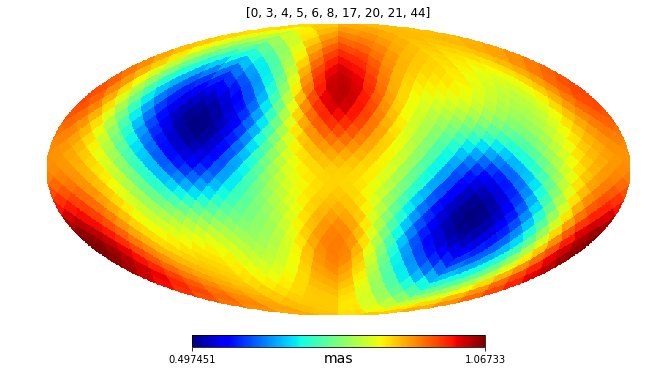

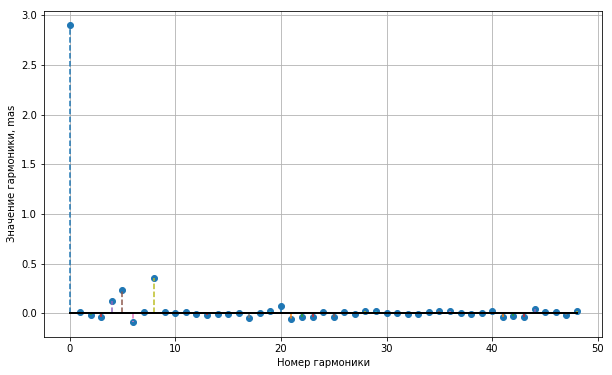

get_healpix:k=9, (ecl_lon,ecl_lat)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_difference_abs LinregressResult(slope=1.2566326501972678, intercept=0.060719494313576261, rvalue=0.67314988264201137, pvalue=3.3595846242098455e-159, stderr=0.039885028096315778)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_error_hip_tgas LinregressResult(slope=1.3513588899597448, intercept=0.039329947834128243, rvalue=0.79590392905394347, pvalue=2.3338897839720577e-263, stderr=0.029698910510030114)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
nobs LinregressResult(slope=-144.71358249876715, intercept=230.82395435083271, rvalue=-0.55334564168150002, pvalue=3.3218206923276886e-97, stderr=6.293673831331704)


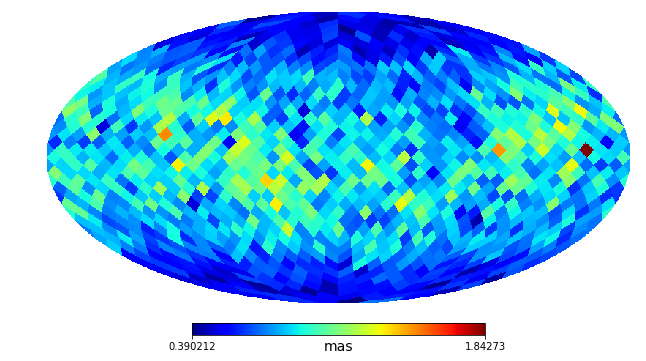

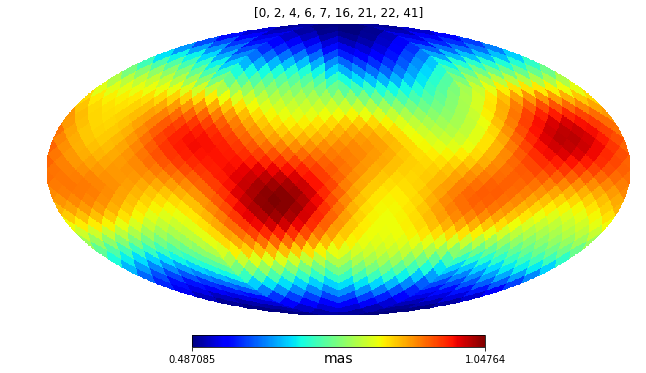

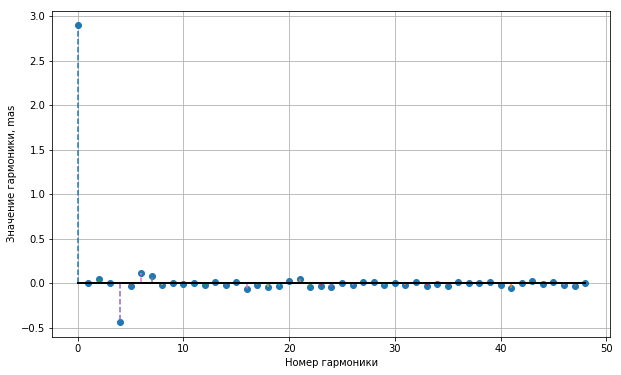

################################################################################
d:	0.0133	0.0133	0.013
k:	[0, 2, 4, 5, 6, 7, 8, 17, 21, 23, 24, 47]	[0, 3, 4, 5, 6, 8, 17, 20, 21, 44]	[0, 2, 4, 6, 7, 16, 21, 22, 41]
################################################################################
id__	ra,dec	s_rd	__l,b__	s_rd	lon,lat	s_ll	
0 &2.8959 &0.0133 &2.8975 &0.0133 &2.8978 &0.013\\
1 &-0.0046 &0.0133 &0.0102 &0.0133 &0.01 &0.013\\
2 &0.0425 &0.0133 &-0.0178 &0.0133 &0.0497 &0.013\\
3 &0.0009 &0.0133 &-0.0405 &0.0133 &0.001 &0.013\\
4 &-0.3086 &0.0134 &0.1275 &0.0133 &-0.4332 &0.013\\
5 &-0.2963 &0.0133 &0.2361 &0.0133 &-0.0253 &0.013\\
6 &0.0758 &0.0133 &-0.088 &0.0133 &0.1149 &0.013\\
7 &0.1118 &0.0133 &0.0116 &0.0133 &0.0825 &0.013\\
8 &0.0547 &0.0133 &0.3507 &0.0133 &-0.0172 &0.013\\
9 &0.0103 &0.0134 &0.0163 &0.0133 &0.0093 &0.0131\\
10 &0.0057 &0.0133 &0.0003 &0.0133 &-0.0114 &0.013\\
11 &0.0143 &0.0133 &0.0153 &0.0133 &0.0009 &0.013\\
12 &-0.0008 &0.0133 &-0.0106 &0.0133 &

In [61]:
get_sf_gr(df_gh_srz,cintro_m0=False,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs',for_y = np.median)


cintro_m="False", arg_m="parallax_error_hip_tgas", arg_y="parallax_error_hip_tgas"
(ra,dec): min_ns=31.0	max_ns=170.0	<function median at 0x7f4a2c13fd08>

(l,b):    min_ns=31.0	max_ns=174.0	<function median at 0x7f4a2c13fd08>

(lon,lat):min_ns=35.0	max_ns=169.0	<function median at 0x7f4a2c13fd08>

################################################################################
kx0 = 5.76270157041162
kx1 = 5.579710242610191
kx2 = 5.425499856592484

################################################################################
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
j =	0	3.5733
j =	1	-0.0535
j =	2	0.0461
j =	4	-0.3293
j =	5	-0.3608
j =	6	0.1357
j =	7	0.1571
j =	8	0.0544
j =	11	0.0257
j =	16	-0.0694
j =	17	-0.108
j =	18	-0.0339
j =	19	-0.0536
j =	20	0.0776
j =	21	0.0451
j =	22	0.0355
j =	23	-0.0592
j =	24	-0.0316
j =	25	0.0263
j =	36	-0.0353
j =	37	0.0263
j =	40	0.034
j =	41	-0.045
j =	42	-0.0338
j =	44	0.0359
j =	46	-0.0238
j =	47	-0.0381
++++

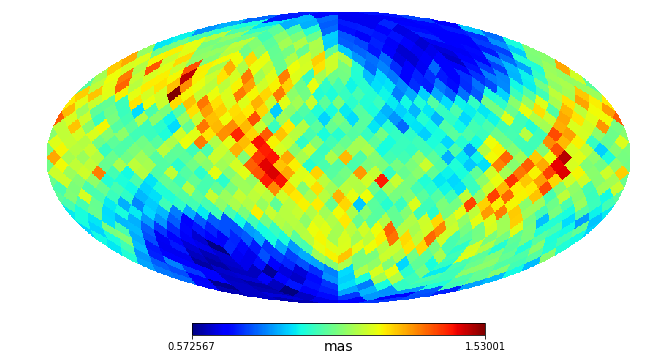

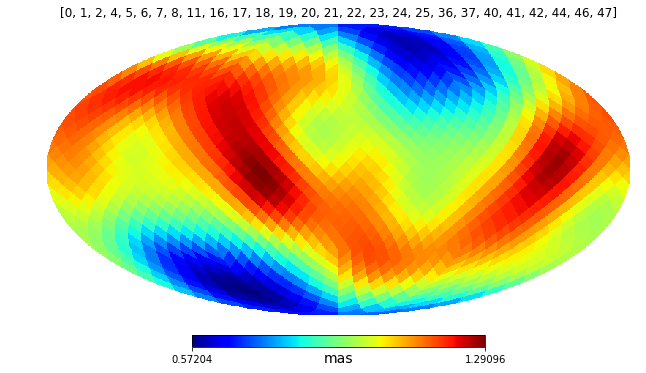

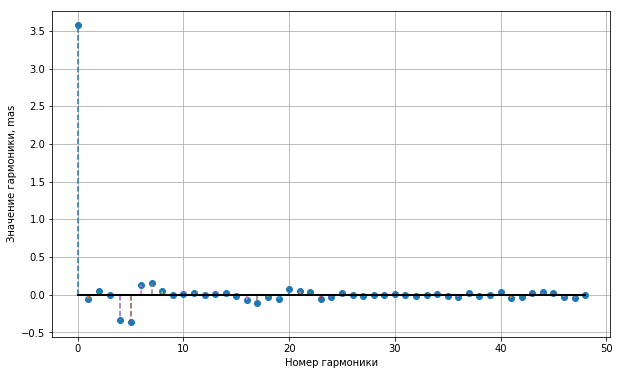

get_healpix:k=20, (l,b)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_difference_abs LinregressResult(slope=-0.3943870973555636, intercept=1.4855125473151309, rvalue=-0.25938761518076681, pvalue=6.6722805213389135e-20, stderr=0.042424843326390071)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_error_hip_tgas LinregressResult(slope=-0.45235539060736901, intercept=1.5999747246031835, rvalue=-0.32710924509832434, pvalue=2.5400885963352787e-31, stderr=0.037755842024841134)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
nobs LinregressResult(slope=32.315546124856411, intercept=79.944663073848261, rvalue=0.15171265252521809, pvalue=1.287632468510469e-07, stderr=6.0828184264260576)


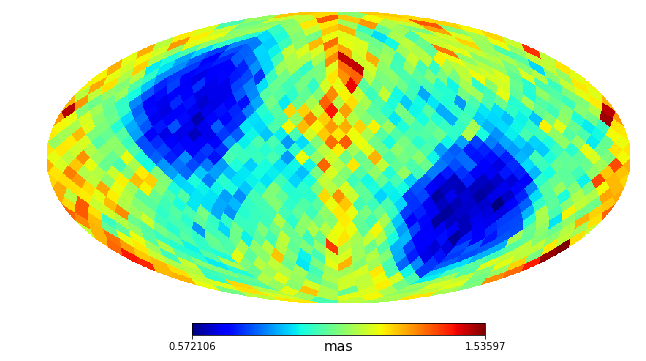

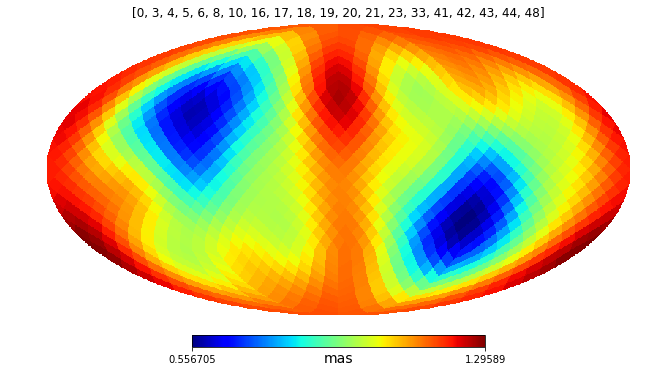

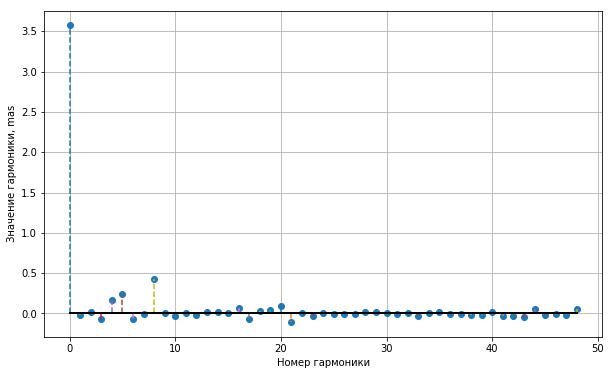

get_healpix:k=19, (ecl_lon,ecl_lat)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_difference_abs LinregressResult(slope=1.0251874276764068, intercept=0.054186452718574696, rvalue=0.68041037142596472, pvalue=6.3714964718934161e-164, stderr=0.031901268533392729)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_error_hip_tgas LinregressResult(slope=1.1257975373703755, intercept=0.0087734280237139473, rvalue=0.82151303412380039, pvalue=1.4423403046858211e-294, stderr=0.022575471111969121)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
nobs LinregressResult(slope=-94.136149155148573, intercept=207.44638281976745, rvalue=-0.44597225971784665, pvalue=1.0545302874964784e-59, stderr=5.4584069317298756)


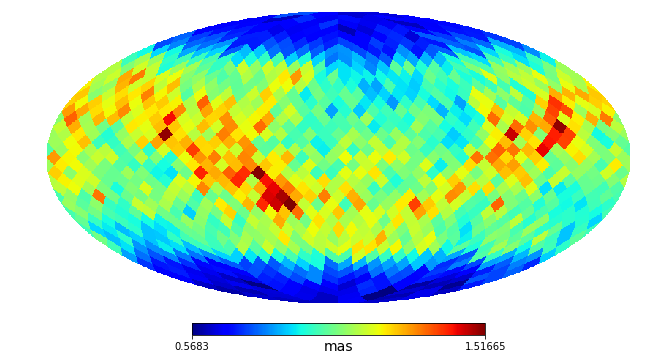

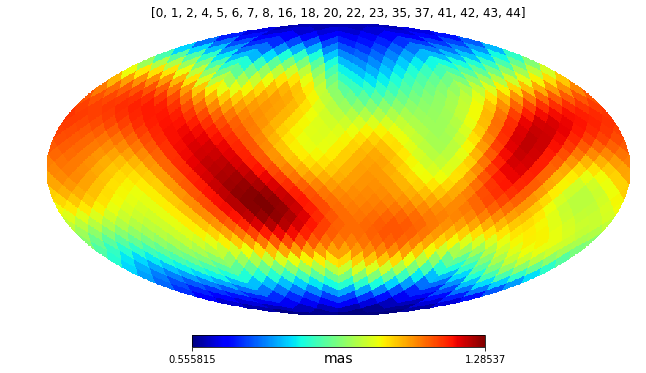

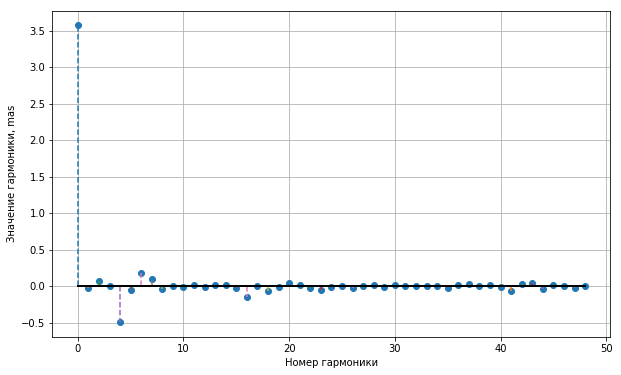

################################################################################
d:	0.0079	0.0078	0.0079
k:	[0, 1, 2, 4, 5, 6, 7, 8, 11, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 36, 37, 40, 41, 42, 44, 46, 47]	[0, 3, 4, 5, 6, 8, 10, 16, 17, 18, 19, 20, 21, 23, 33, 41, 42, 43, 44, 48]	[0, 1, 2, 4, 5, 6, 7, 8, 16, 18, 20, 22, 23, 35, 37, 41, 42, 43, 44]
################################################################################
id__	ra,dec	s_rd	__l,b__	s_rd	lon,lat	s_ll	
0 &3.5733 &0.0079 &3.5716 &0.0078 &3.5745 &0.0079\\
1 &-0.0535 &0.0079 &-0.0214 &0.0078 &-0.0313 &0.0079\\
2 &0.0461 &0.0079 &0.0161 &0.0078 &0.0656 &0.0079\\
3 &-0.0033 &0.0079 &-0.0724 &0.0078 &-0.0032 &0.0079\\
4 &-0.3293 &0.0079 &0.1709 &0.0078 &-0.4918 &0.0079\\
5 &-0.3608 &0.0079 &0.2467 &0.0078 &-0.0599 &0.0079\\
6 &0.1357 &0.0079 &-0.0738 &0.0078 &0.1862 &0.0079\\
7 &0.1571 &0.0079 &-0.0031 &0.0078 &0.0918 &0.0079\\
8 &0.0544 &0.0079 &0.4322 &0.0078 &-0.0377 &0.0079\\
9 &0.0014 &0.0079 &0.0021 &0.0078 &0.0034

In [62]:
get_sf_gr(df_gh_srz,cintro_m0=False,arg_m0='parallax_error_hip_tgas',arg_y0='parallax_error_hip_tgas',for_y = np.median)


cintro_m="False", arg_m="nobs", arg_y="nobs"
(ra,dec): min_ns=31.0	max_ns=170.0	<function median at 0x7f4a2c13fd08>

At line 19 of file main_lsq.f90 (unit = 20, file = 'y.in')
Fortran runtime error: End of file
(l,b):    min_ns=31.0	max_ns=174.0	<function median at 0x7f4a2c13fd08>

At line 19 of file main_lsq.f90 (unit = 20, file = 'y.in')
Fortran runtime error: End of file
(lon,lat):min_ns=35.0	max_ns=169.0	<function median at 0x7f4a2c13fd08>

At line 19 of file main_lsq.f90 (unit = 20, file = 'y.in')
Fortran runtime error: End of file
################################################################################
kx0 = 5.425499856592484
kx1 = 5.425499856592484
kx2 = 5.425499856592484

################################################################################
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
j =	0	3.5745
j =	1	-0.0313
j =	2	0.0656
j =	4	-0.4918
j =	5	-0.0599
j =	6	0.1862
j =	7	0.0918
j =	8	-0.0377
j =	16	-0.1522
j =	18	-0.0673
j 

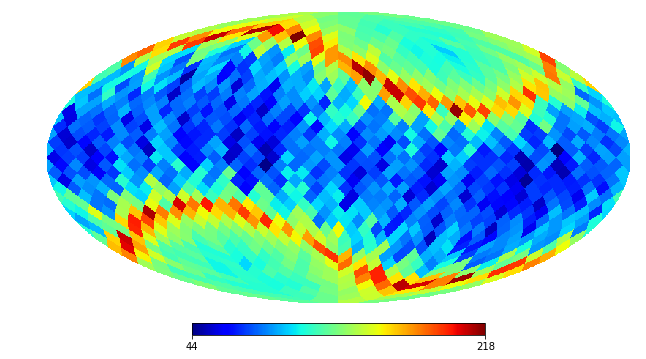

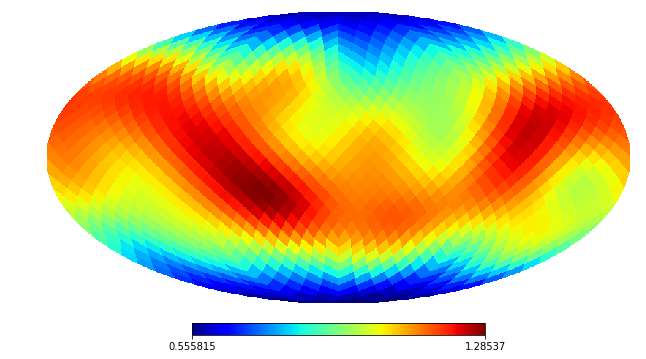

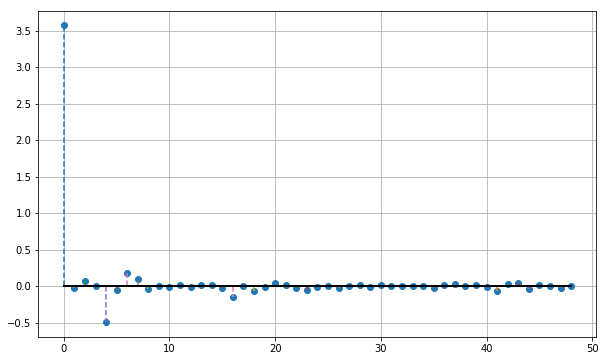

get_healpix:k=19, (l,b)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_difference_abs LinregressResult(slope=1.0251874276764068, intercept=0.054186452718574696, rvalue=0.68041037142596472, pvalue=6.3714964718934161e-164, stderr=0.031901268533392729)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_error_hip_tgas LinregressResult(slope=1.1257975373703755, intercept=0.0087734280237139473, rvalue=0.82151303412380039, pvalue=1.4423403046858211e-294, stderr=0.022575471111969121)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
nobs LinregressResult(slope=-94.136149155148573, intercept=207.44638281976745, rvalue=-0.44597225971784665, pvalue=1.0545302874964784e-59, stderr=5.4584069317298756)


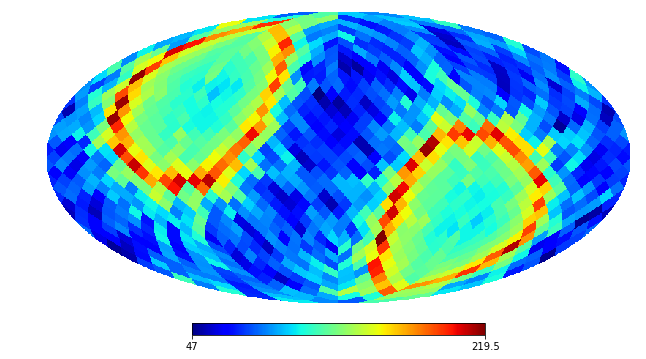

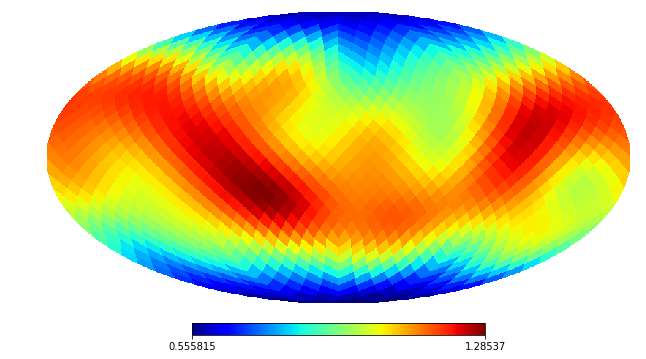

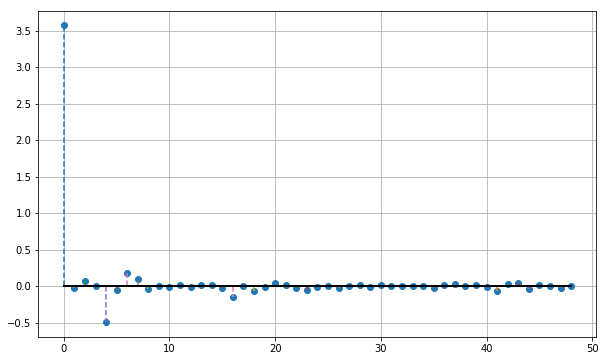

get_healpix:k=19, (ecl_lon,ecl_lat)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_difference_abs LinregressResult(slope=1.0251874276764068, intercept=0.054186452718574696, rvalue=0.68041037142596472, pvalue=6.3714964718934161e-164, stderr=0.031901268533392729)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_error_hip_tgas LinregressResult(slope=1.1257975373703755, intercept=0.0087734280237139473, rvalue=0.82151303412380039, pvalue=1.4423403046858211e-294, stderr=0.022575471111969121)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
nobs LinregressResult(slope=-94.136149155148573, intercept=207.44638281976745, rvalue=-0.44597225971784665, pvalue=1.0545302874964784e-59, stderr=5.4584069317298756)


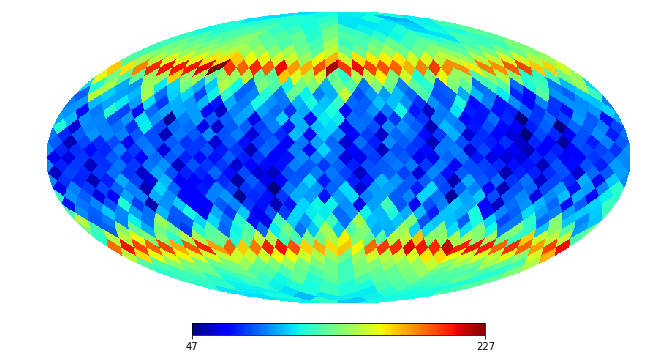

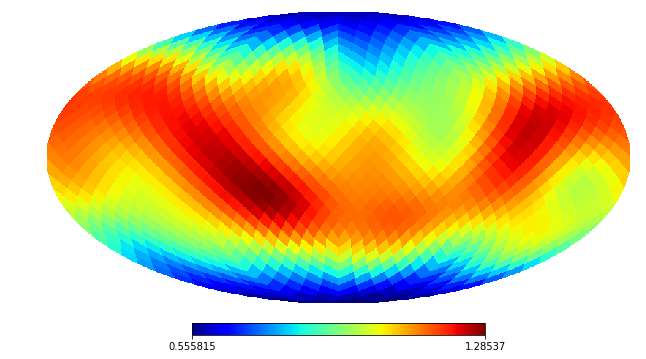

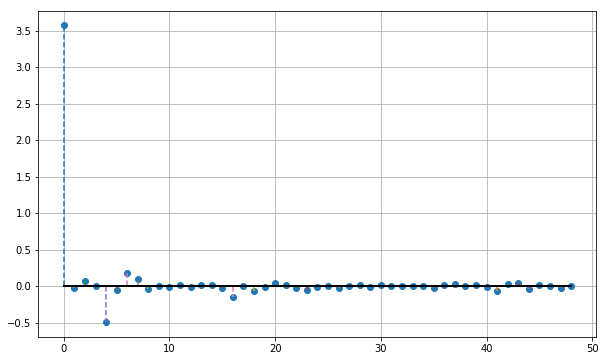

################################################################################
d:	0.0079	0.0079	0.0079
k:	[0, 1, 2, 4, 5, 6, 7, 8, 16, 18, 20, 22, 23, 35, 37, 41, 42, 43, 44]	[0, 1, 2, 4, 5, 6, 7, 8, 16, 18, 20, 22, 23, 35, 37, 41, 42, 43, 44]	[0, 1, 2, 4, 5, 6, 7, 8, 16, 18, 20, 22, 23, 35, 37, 41, 42, 43, 44]
################################################################################
id__	ra,dec	s_rd	__l,b__	s_rd	lon,lat	s_ll	
0 &3.5745 &0.0079 &3.5745 &0.0079 &3.5745 &0.0079\\
1 &-0.0313 &0.0079 &-0.0313 &0.0079 &-0.0313 &0.0079\\
2 &0.0656 &0.0079 &0.0656 &0.0079 &0.0656 &0.0079\\
3 &-0.0032 &0.0079 &-0.0032 &0.0079 &-0.0032 &0.0079\\
4 &-0.4918 &0.0079 &-0.4918 &0.0079 &-0.4918 &0.0079\\
5 &-0.0599 &0.0079 &-0.0599 &0.0079 &-0.0599 &0.0079\\
6 &0.1862 &0.0079 &0.1862 &0.0079 &0.1862 &0.0079\\
7 &0.0918 &0.0079 &0.0918 &0.0079 &0.0918 &0.0079\\
8 &-0.0377 &0.0079 &-0.0377 &0.0079 &-0.0377 &0.0079\\
9 &0.0034 &0.0079 &0.0034 &0.0079 &0.0034 &0.0079\\
10 &-0.0093 &0.0079 &-0.0

In [18]:
%%time
#get_sf_gr(df_gh_srz,cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr(df_gh_srz,cintro_m0=True,arg_m0='',arg_y0='parallax_difference_abs')
get_sf_gr(df_gh_srz,cintro_m0=False,arg_m0='nobs',arg_y0='nobs',for_y = np.median)








#get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs']<3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=False,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')
#get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs']<3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')
#get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=False,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')
#get_sf_gr(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']],cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')



cintro_m="False", arg_m="parallax_difference_abs", arg_y="parallax_difference_abs"
(ra,dec): min_ns=31.0	max_ns=170.0	<function <lambda> at 0x7f49faf2d730>

(l,b):    min_ns=31.0	max_ns=174.0	<function <lambda> at 0x7f49faf2d730>

(lon,lat):min_ns=35.0	max_ns=169.0	<function <lambda> at 0x7f49faf2d730>

################################################################################
kx0 = 7.551159738537919
kx1 = 7.684365370883928
kx2 = 7.799900306544334

################################################################################
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
j =	0	4.0373
j =	4	-0.2919
j =	5	-0.4379
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
j =	0	4.0499
j =	5	0.2451
j =	8	0.4751
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
j =	0	4.036
j =	4	-0.4998
get_healpix:k=3, (ra,dec)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_difference_abs L

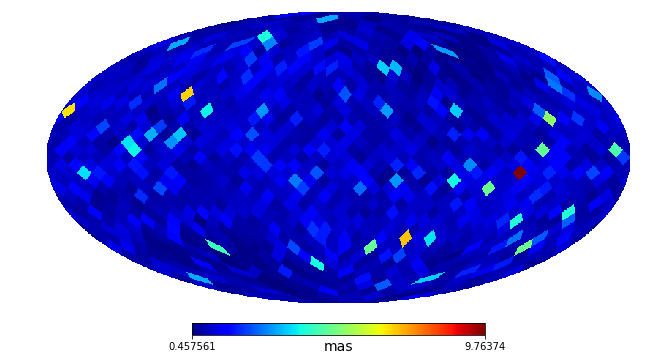

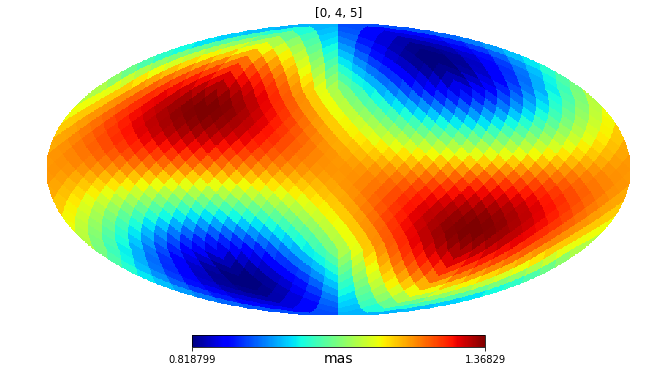

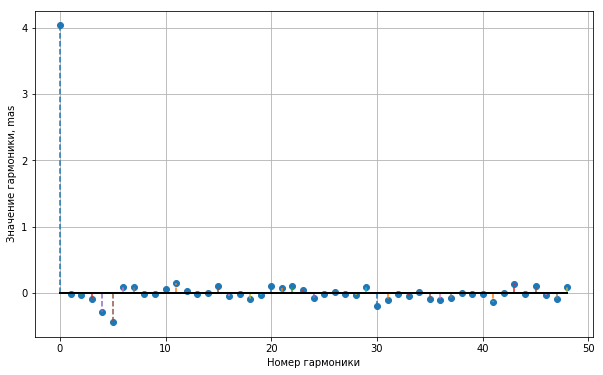

get_healpix:k=3, (l,b)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_difference_abs LinregressResult(slope=-0.10101395960027128, intercept=1.2035919876479784, rvalue=-0.061682605132348113, pvalue=0.032634126709813464, stderr=0.047223972049428693)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_error_hip_tgas LinregressResult(slope=-0.10733224149098244, intercept=1.2668724033159269, rvalue=-0.072060624628725201, pvalue=0.012528487088768157, stderr=0.042921337040844353)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
nobs LinregressResult(slope=4.4244144388639812, intercept=107.44623361871491, rvalue=0.019285054796816217, pvalue=0.50450406155014282, stderr=6.6271338117872194)


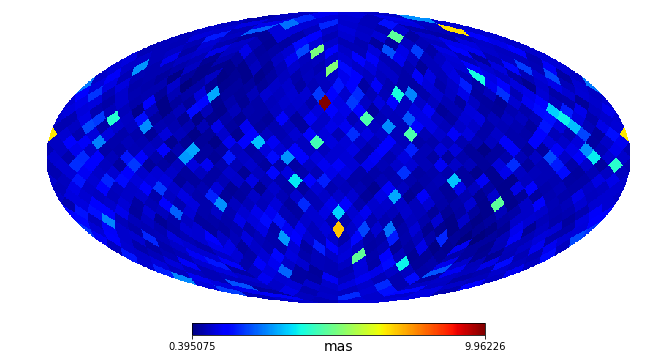

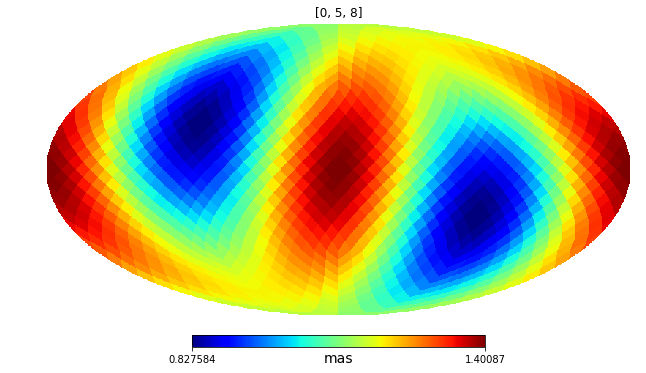

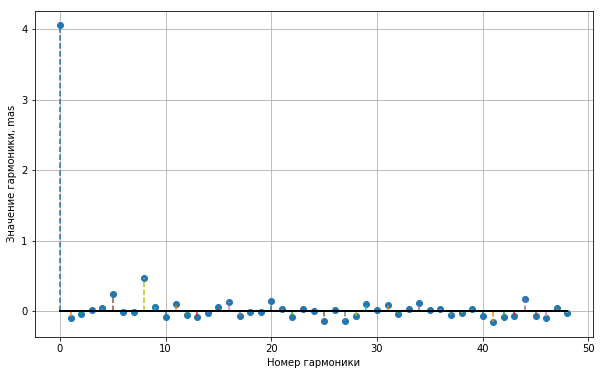

get_healpix:k=2, (ecl_lon,ecl_lat)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_difference_abs LinregressResult(slope=1.1076145137642786, intercept=-0.17304497982744627, rvalue=0.63126147004083411, pvalue=2.1275710016334246e-134, stderr=0.039316241653012576)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
parallax_error_hip_tgas LinregressResult(slope=1.1551891509643097, intercept=-0.17115584859886268, rvalue=0.7238694641592216, pvalue=2.4905845869416854e-195, stderr=0.031810745132299853)
min_ns=35.0	max_ns=169.0	<function mean at 0x7f4a2c1d8400>
nobs LinregressResult(slope=-158.09521332626693, intercept=292.52277420313129, rvalue=-0.64316607565757844, pvalue=4.7227674388595664e-141, stderr=5.4380222589182159)


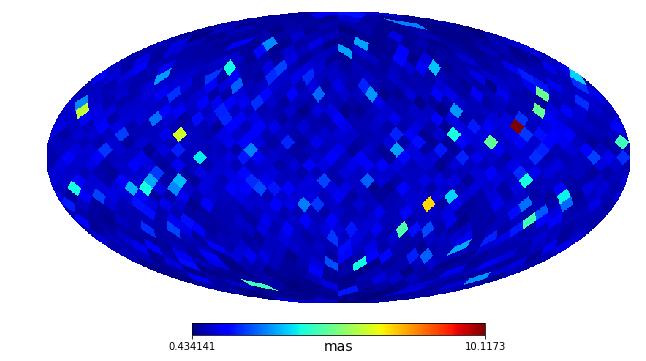

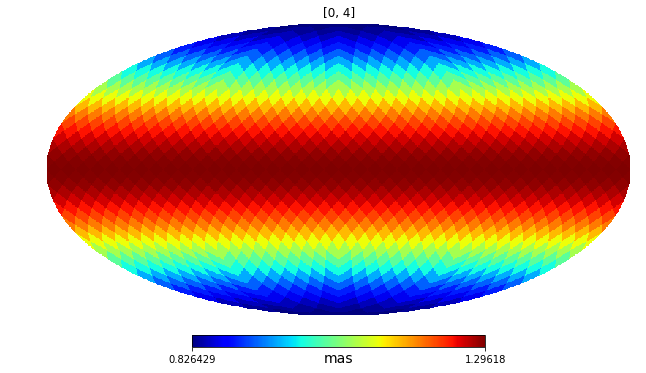

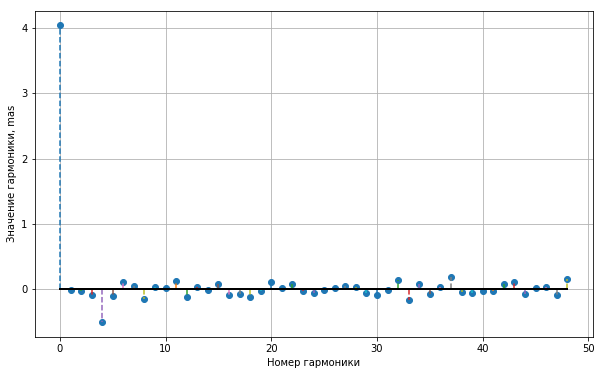

################################################################################
d:	0.0695	0.0705	0.0692
k:	[0, 4, 5]	[0, 5, 8]	[0, 4]
################################################################################
id__	ra,dec	s_rd	__l,b__	s_rd	lon,lat	s_ll	
0 &4.0373 &0.0695 &4.0499 &0.0705 &4.036 &0.0692\\
1 &-0.0173 &0.0696 &-0.0934 &0.0706 &-0.0172 &0.0692\\
2 &-0.028 &0.0695 &-0.035 &0.0705 &-0.0273 &0.0692\\
3 &-0.0976 &0.0695 &0.0202 &0.0705 &-0.0944 &0.0692\\
4 &-0.2919 &0.0696 &0.049 &0.0706 &-0.4998 &0.0693\\
5 &-0.4379 &0.0695 &0.2451 &0.0705 &-0.1013 &0.0691\\
6 &0.085 &0.0695 &-0.02 &0.0705 &0.1138 &0.0691\\
7 &0.0909 &0.0695 &-0.0155 &0.0705 &0.0573 &0.0692\\
8 &-0.0214 &0.0695 &0.4751 &0.0705 &-0.1475 &0.0692\\
9 &-0.0207 &0.0697 &0.0551 &0.0707 &0.0412 &0.0693\\
10 &0.0564 &0.0695 &-0.0884 &0.0705 &0.0193 &0.0692\\
11 &0.1507 &0.0695 &0.1049 &0.0705 &0.1279 &0.0692\\
12 &0.0365 &0.0695 &-0.0563 &0.0705 &-0.1138 &0.0691\\
13 &-0.0096 &0.0695 &-0.0882 &0.0705 &0.0348 &0.

In [80]:
%%time


get_sf_gr(df_gh_srz,cintro_m0=False,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs',for_y = DDD)


cintro_m="False", arg_m="", arg_y="parallax_difference_abs"
(ra,dec): min_ns=0.0	max_ns=5.0	
(l,b):    min_ns=0.0	max_ns=6.0	
(lon,lat):min_ns=0.0	max_ns=6.0	
################################################################################
kx0 = 45.94140157657325
kx1 = 46.41373495161114
kx2 = 46.47168678483053

################################################################################
d=35.34046255965771,	M=0.004890710460571124,	D=0.0518988050447658
j =	0	0.3442
j =	5	-0.055
d=35.5275312810182,	M=0.00769879719137655,	D=0.05117271481330084
j =	0	0.3433
d=38.571671689187895,	M=0.00550930297423264,	D=0.052204350039732166
j =	0	0.345
get_healpix:k=2, (ra,dec)
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=0.89570460162502596, intercept=1.0012153150400309, rvalue=0.056291037237328645, pvalue=0.051236650110796617, stderr=0.45899502935539571)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=0.82428554136922971, intercept=1.064212026192376

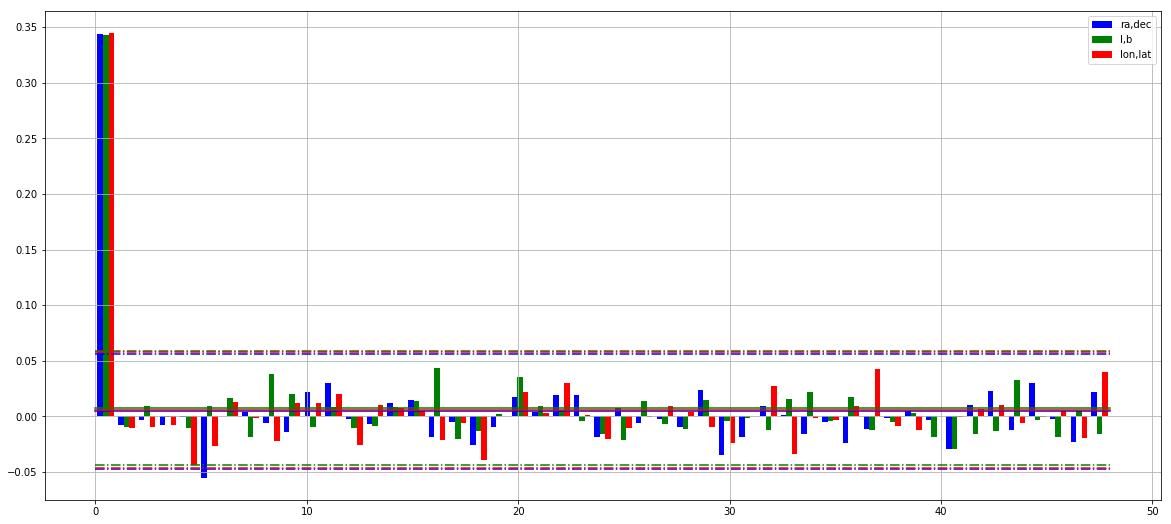

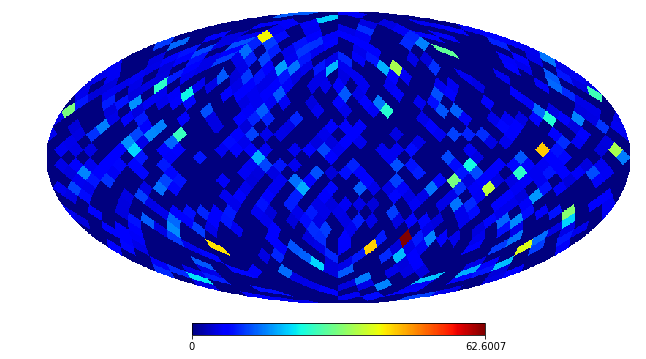

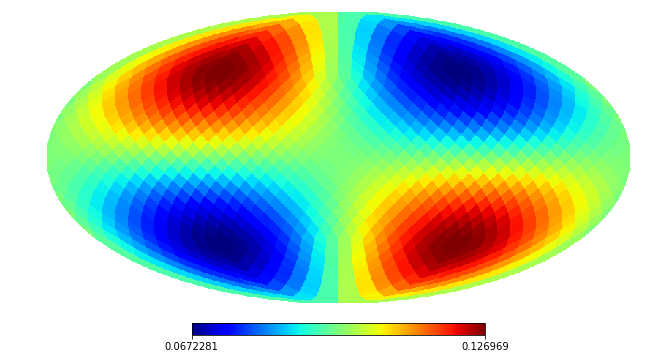

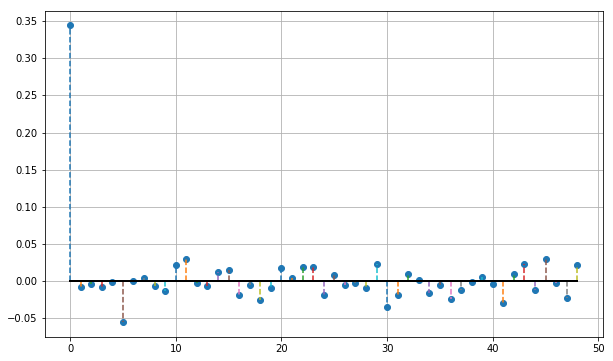

################################################################################
d:	35.3405	35.5275	38.5717
M:	0.0049	0.0077	0.0055
k:	[0, 5]	[0]	[0]
################################################################################
id__	ra,dec	__l,b__	lon,lat	s_rd	s_lb	s_ll	
0 &0.3442 &0.3433 &0.345 &0.0519 &0.0512 &0.0522\\
1 &-0.0077 &-0.0099 &-0.0105 &0.0519 &0.0512 &0.0522\\
2 &-0.0034 &0.0089 &-0.0098 &0.0519 &0.0512 &0.0522\\
3 &-0.0081 &-0.0002 &-0.0075 &0.0519 &0.0512 &0.0522\\
4 &-0.0008 &-0.0105 &-0.0441 &0.0519 &0.0512 &0.0522\\
5 &-0.055 &0.0097 &-0.0264 &0.0519 &0.0512 &0.0522\\
6 &0.0007 &0.017 &0.013 &0.0519 &0.0512 &0.0522\\
7 &0.0042 &-0.0187 &-0.0019 &0.0519 &0.0512 &0.0522\\
8 &-0.0062 &0.0385 &-0.0222 &0.0519 &0.0512 &0.0522\\
9 &-0.0138 &0.02 &0.0123 &0.0519 &0.0512 &0.0522\\
10 &0.022 &-0.0097 &0.0117 &0.0519 &0.0512 &0.0522\\
11 &0.0297 &0.0089 &0.0205 &0.0519 &0.0512 &0.0522\\
12 &-0.0026 &-0.0103 &-0.0259 &0.0519 &0.0512 &0.0522\\
13 &-0.0066 &-0.0084 &0.01 &0.0

/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:108: RuntimeWarning: invalid value encountered in true_divide
/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:113: RuntimeWarning: invalid value encountered in true_divide


(ra,dec)	max_dl=14.98	max_db=4.54	min_ns=0.0	max_ns=5.0	
(l,b)	max_dl=40.87	max_db=4.42	min_ns=0.0	max_ns=6.0	
(lon,lat)	max_dl=42.87	max_db=4.68	min_ns=0.0	max_ns=6.0	
################################################################################
kx0 = 208.43958752941654
kx1 = 268.6799000775167
kx2 = 144.05714365913238

################################################################################


IndexError: index 0 is out of bounds for axis 0 with size 0

In [39]:

%%time


MMM_KEK = df_gh_srz['parallax_difference'].sum()/len(df_gh_srz['parallax_difference'])
DDD_KEK = np.sqrt(sum([np.power(i-MMM_KEK,2) for i in df_gh_srz['parallax_difference']])/len(df_gh_srz['parallax_difference']))

get_sf_gr(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 3 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
get_sf_gr(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 3 * DDD_KEK],cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')


#get_sf_gr(cintro_m0=False,arg_m0='',arg_y0='parallax_error_hip_tgas')
#get_sf_gr(cintro_m0=True,arg_m0='',arg_y0='parallax_error_hip_tgas')
#get_sf_gr(cintro_m0=True,arg_m0='parallax_error_hip_tgas',arg_y0='parallax_error_hip_tgas')


In [18]:
#df_gh_srz[df_gh_srz['parallax_difference_abs'] > 3*df_gh_srz['parallax_error_hip_tgas']]

In [19]:
def get_Y_err(arg_l = 'l', arg_b = 'b', arg_summ = 'parallax_difference_abs', err = 'parallax_error_hip_tgas'):
    Ny_ = np.zeros(nside_a_n)
    Y_ = np.zeros(nside_a_n)
    srezx = 3 * df_gh_srz[err] < df_gh_srz[arg_summ]
    for i in ii(df_gh_srz[srezx][arg_b],df_gh_srz[srezx][arg_l]):
        Ny_[i] += 1
    print('min_ns={}\tmax_ns={}\t'.format(min(Ny_),max(Ny_)),end='') #nmin_n_in_sector max_n_in_sector
    for i,rm in zip(ii(df_gh_srz[srezx][arg_b],df_gh_srz[srezx][arg_l]),df_gh_srz[srezx][arg_summ]):
        Y_[i] += rm
    return [Y_[i] / Ny_[i] if (Ny_[i] > 0) else 0 for i in np.arange(nside_a_n)] 

In [20]:
NSIDE = 10
sfet_f_n = 48
nside_a_n = NSIDE**2 * 12
n_array_nside = np.arange(hp.nside2npix(NSIDE))

Am0 ,Y0= get_a(df_gh_srz,'ecl_lon','ecl_lat',False,'parallax_difference_abs','parallax_difference_abs')
X0 = np.linalg.lstsq(Am0,get_Y_err('ecl_lon', 'ecl_lat','parallax_difference_abs','parallax_error_hip_tgas'))
#df_gh_srz[df_gh_srz['parallax_difference_abs'] > 3*df_gh_srz['parallax_error_hip_tgas']]

min_ns=35.0	max_ns=169.0	
min_ns=0.0	max_ns=7.0	

d=13.143075258983071,	M=0.20134279705931157,	D=2.777887961709053
j =	0	11.3003
min_ns=35.0	max_ns=169.0	parallax_difference_abs LinregressResult(slope=0.080000000000000002, intercept=0.21190973589827161, rvalue=3.3514508126706087e-16, pvalue=0.99999999999999067, stderr=6896499802084.7139)
min_ns=35.0	max_ns=169.0	parallax_error_hip_tgas LinregressResult(slope=0.23666666666666669, intercept=-0.19166766997250306, rvalue=9.5105393133690055e-16, pvalue=0.9999999999999738, stderr=7189580319063.4365)
min_ns=35.0	max_ns=169.0	nobs LinregressResult(slope=-0.085833333333333345, intercept=0.76436900900312654, rvalue=-2.524790735739104e-16, pvalue=0.99999999999999301, stderr=9822050928352.6309)


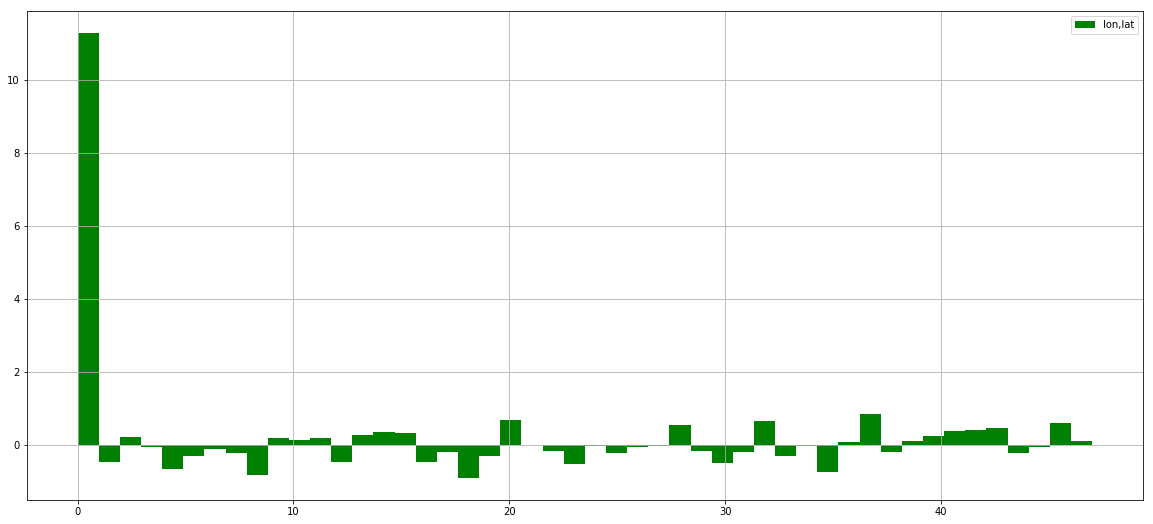

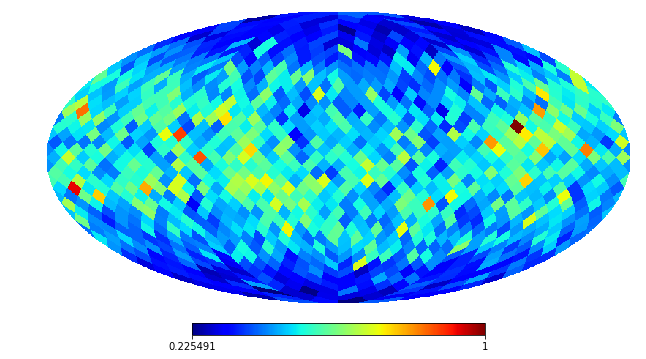

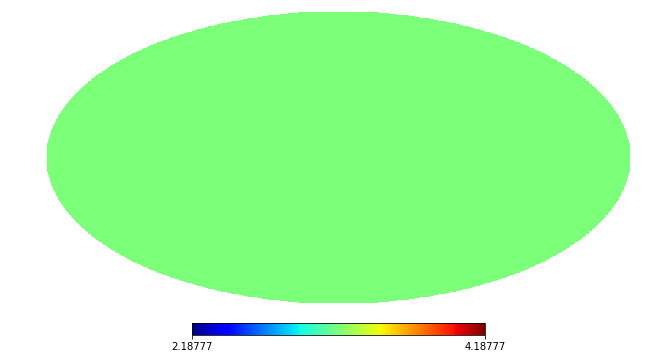

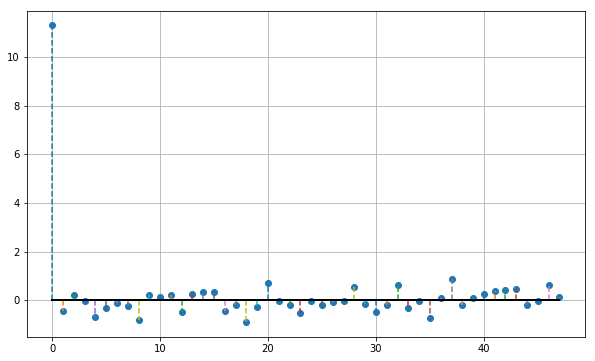

In [21]:
d0,M0,D0,k0 = statis(X0)
    
plt.figure(figsize=(20,9))
labels = ['lon,lat']
xx = [ i for i in np.arange(sfet_f_n)]
plt.hist([xx], sfet_f_n, weights = [X0[0]],histtype='bar', color=['g'], label=labels)
plt.legend(prop={'size': 10})
plt.grid()
    
if (len(k0)>1):
    print('get_healpix:k={}, (ra,dec)'.format(len(k0)))
get_healpix_sf(X0,Y0,k0)
   

min_ns=35.0	max_ns=169.0	

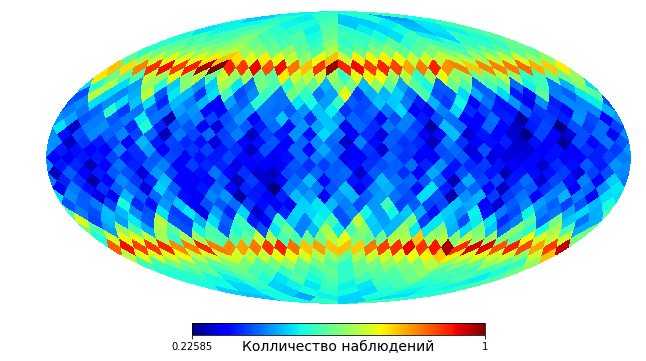

In [22]:
NSIDE = 10
sfet_f_n = 100
nside_a_n = NSIDE**2 * 12
n_array_nside = np.arange(hp.nside2npix(NSIDE))

hp.mollview(np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','nobs')),title = '',unit='Колличество наблюдений',xsize = 1800,cmap='jet')

In [23]:
#parallax_difference_abs,parallax_error_hip_tgas
a = np.array(get_Y(df_gh_srz,
                   arg_l = 'ecl_lon', arg_b = 'ecl_lat', arg_summ = 'parallax_error_hip_tgas'))
b = np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','nobs'))

#a = [1,2,3]
#b = [2,5,4]
from scipy.stats import linregress
linregress(df_gh_srz['nobs'],df_gh_srz['parallax_error_hip_tgas'] )

min_ns=35.0	max_ns=169.0	min_ns=35.0	max_ns=169.0	

LinregressResult(slope=-0.0022978998012539941, intercept=1.3997582209596087, rvalue=-0.12199052869501818, pvalue=2.5132627334796097e-296, stderr=6.2223006190737624e-05)

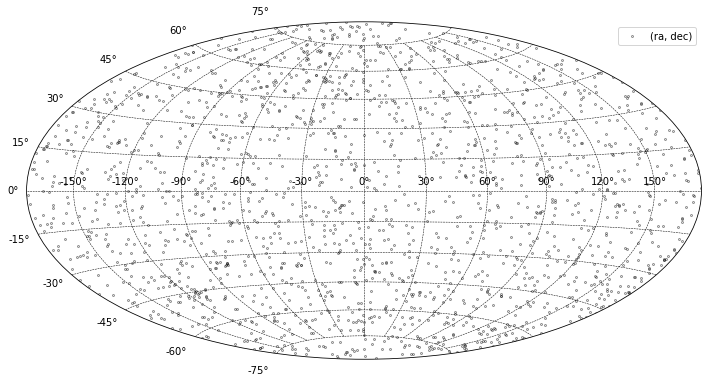

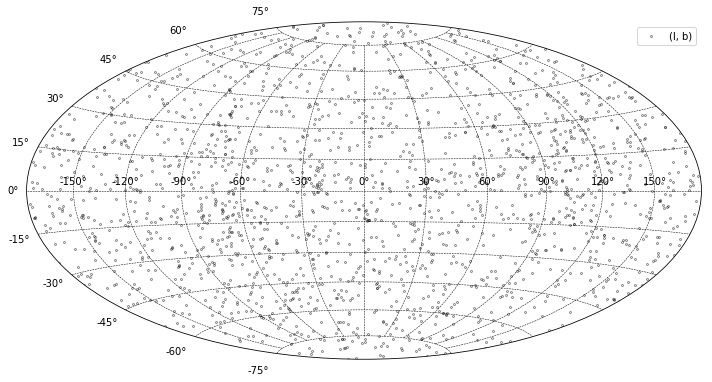

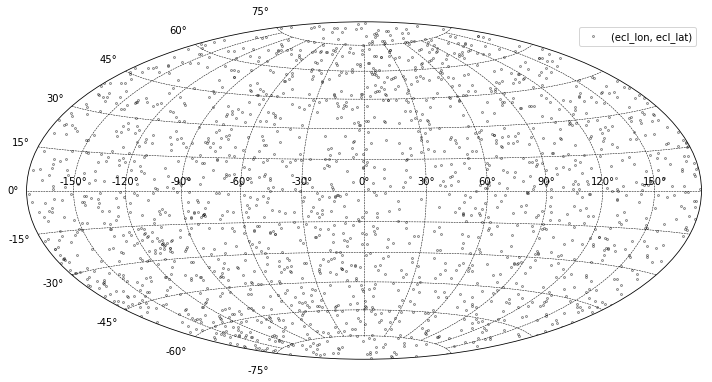

CPU times: user 980 ms, sys: 12 ms, total: 992 ms
Wall time: 984 ms


In [24]:
%%time

plt.figure(figsize=(10,6))
#print('{}: [/] Begin plot_hammer paralax.'.format(times()))
def hammer(df0,x,y):
#    print('{}: [/] Begin plot_hammer paralax {}, {}.'.format(times(),x,y))
    plt.figure(figsize=(10,6))
    plt.clf()
    ax = plt.subplot(111, projection = 'hammer')
    ax.scatter(
        df0[x]*np.pi/180-np.pi,
        df0[y]*np.pi/180-np.pi/2,
        s = .15,
        marker='o',
        color = 'k',
        linewidths=2.01,
        label = '({}, {})'.format(x,y)
    )
    #ax.contour(X,Y,Z,10,colors='k')
    #ax.scatter([0],[np.pi/2],color = 'g')#,51.1,marker='o',color = 'r',linewidths=0.01)
    #''''o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X''''
    plt.legend(loc='best');
    plt.grid(color='k', linestyle='--', linewidth=0.5)
    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    plt.tight_layout()
    #plt.savefig('hammer_'+str(x)+'_'+str(y)+'.png',dpi=1000,format='png')
#    print('{}: [/] End plot_hammer paralax.'.format(times()))
    plt.show()
    
#hammer(df_gh_srz,'ra','dec')
#hammer(df_gh_srz,'l','b')
#hammer(df_gh_srz,'ecl_lon','ecl_lat')
hammer(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']],'ra','dec')
hammer(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']],'l','b')
hammer(df_gh_srz[df_gh_srz['parallax_difference_abs']>3*df_gh_srz['parallax_error_hip_tgas']],'ecl_lon','ecl_lat')



In [89]:

ii = lambda b,l: hp.ang2pix(NSIDE,b/180*np.pi,l/180*np.pi)

def get_Y(df_gh_srz,arg_l = 'l', arg_b = 'b', arg_summ = ''):
    Ny_ = np.zeros(nside_a_n)
    Y_ = np.zeros(nside_a_n)
    for i in ii(df_gh_srz[arg_b],df_gh_srz[arg_l]):
        Ny_[i] += 1
    print('min_ns={}\tmax_ns={}\t'.format(min(Ny_),max(Ny_)),end='') #nmin_n_in_sector max_n_in_sector
    for i,rm in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_summ]):
        Y_[i] += rm
    Y__ = [Y_[i] / Ny_[i] if (Ny_[i] > 0) else .0 for i in np.arange(nside_a_n)]
    return Y__ #/ max(Y__)

def get_a(df_gh_srz,arg_l0,arg_b0,cintro_m=False,arg_m = '',arg_y = ''):
    
    def get_lb(df_gh_srz,arg_l = 'l', arg_b = 'b',arg_m=''):
        Nl_ = [[] for i in np.arange(nside_a_n)]
        ll_ = [[] for i in np.arange(nside_a_n)]
        bb_ = [[] for i in np.arange(nside_a_n)]
        mm_ = [[] for i in np.arange(nside_a_n)]
        kl12 = [0 for i in np.arange(nside_a_n)]
        lb12 = [0 for i in np.arange(nside_a_n)]
        
        
        if (arg_m == ''):
            arg_m = arg_l
        for i,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_m]):
            if (arg_m == arg_l):
                m_ = 1
            Nl_[i].append(np.abs(m_))
        for i,rm1,rm2,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b],df_gh_srz[arg_m]):
            if (arg_m == arg_l):
                m_ = 1
            ll_[i].append(rm1)
            bb_[i].append(rm2)
            mm_[i].append(m_)
            
        for i in np.arange(nside_a_n):
            if len(ll_[i])>1 and max(ll_[i]) - min (ll_[i]) > 181:
                ll_[i] = [j if (j<180) else j-360 for j in ll_[i]]
                #print(i,max(ll_[i]),min(ll_[i]), end=' ')
                #klsum_ = np.dot(ll_[i],mm_[i])
                #kl12_ = (klsum_/sum(Nl_[i])/180)*np.pi
                #if (kl12_ < 0):
                #    kl12_ += 2*np.pi
                #print(kl12_*180/np.pi if (kl12_*180/np.pi < 360) else (kl12_*180/np.pi,'FFFFFFFFF'))
        
        for i in np.arange(nside_a_n):
            klsum = np.dot(ll_[i],mm_[i])
            kl12[i] = (klsum/sum(Nl_[i])/180)*np.pi
            if (kl12[i] < 0):
                kl12[i] += 2*np.pi
                
            lbsum = np.dot(bb_[i],mm_[i])
            lb12[i] = (lbsum/sum(Nl_[i])/180)*np.pi
            #print(i,kl12[i],lb12[i])
            
        return kl12, lb12
                
        
    '''     
        Nl_ = np.zeros(nside_a_n)
        ll_ = np.zeros(nside_a_n)
        bb_ = np.zeros(nside_a_n)

        if (arg_m != ''):
            #print('|arg_m != ""',end='')
            for i,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_m]):
                Nl_[i] += np.abs(m_)
            for i,rm1,rm2,m_ in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b],df_gh_srz[arg_m]):
                ll_[i] += rm1*m_
                bb_[i] += rm2*m_
        else:
            for i in ii(df_gh_srz[arg_b],df_gh_srz[arg_l]):
                Nl_[i] += 1
            for i,rm1,rm2 in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_l],df_gh_srz[arg_b]):
                ll_[i] += rm1
                bb_[i] += rm2
        
        #for i,j,kl,kb,kn,ij in zip(ll_ / Nl_,bb_ / Nl_,ll_ ,bb_ , Nl_,[i for i in np.arange(len(Nl_))]):
            #if (np.abs(i) > 180 or np.abs(j) > 180):
                #print('\nlb:',ij,i,j,kl,kb,kn)
        return (ll_ / Nl_ /180)*np.pi, (bb_ / Nl_/180)*np.pi'''
    
   

    
    get_dif_l = lambda x,y: min((x-y)%(2*np.pi),-(x-y)%(2*np.pi))
    get_dif_b = lambda x,y: min((x-y)%np.pi,-(x-y)%np.pi)
    
    Am = np.zeros((nside_a_n, sfet_f_n))
    
    if (cintro_m == True):
        print("|cintro_m= True",end='')
        arg_l,arg_b = get_lb(df_gh_srz,arg_l0,arg_b0,arg_m)
        maxl,maxb=.0,.0
        for i in n_array_nside:
            get_b, get_l  = list(hp.pix2ang(NSIDE, i))
            #print(i, get_l,get_b)
            if ((get_dif_b(get_b,arg_b[i]) > maxb) or (get_dif_l(get_l,arg_l[i]) > maxl)):
                #print(arg_l[i],arg_b[i],round(get_dif_l(get_l,arg_l[i]),2),round(get_dif_b(get_b,arg_b[i]),2))
                maxb,maxl=max(get_dif_b(get_b,arg_b[i]),maxb),max(get_dif_l(get_l, arg_l[i]),maxl)
                print('\r({},{})\tmax_dl={}\tmax_db={}\t'.format(arg_l0[-3:],arg_b0[-3:],round(maxl*180/np.pi,2),round(maxb*180/np.pi,2)),end='')
                #print(get_l,arg_l[i],maxl, get_b,arg_b[i], maxb)
            for j in np.arange(sfet_f_n):
                Am[i][j] = FVJ(j, arg_l[i],arg_b[i])
    else:
        for i in n_array_nside:
            get_b, get_l  = list(hp.pix2ang(NSIDE, i))
            for j in np.arange(sfet_f_n):
                Am[i][j] = FVJ(j, get_l,get_b)
    #print('\t| Am creat.', end='')
    
    Y = get_Y(df_gh_srz,arg_l0, arg_b0, arg_y)
    #print('| Y creat.', end='')
    print()
    return Am, Y

MMM = lambda x: sum(x)/len(x)
DDD = lambda x: np.sqrt(sum([np.power(i-MMM(x),2) for i in x])/len(x))

def statis(Zx):
    #print(Zx)
    #print('d={},\tM={},\tD={}'.format(Zx[1][0]/nside_a_n,MMM(Zx[0]),DDD(Zx[0])))
    ink = []
    for k in np.arange(len(Zx[0])):
        if (np.abs(Zx[0][k]- MMM(Zx[0])) - DDD(Zx[0]) > 0):
            ink.append(k)
            print('j =',k,round(Zx[0][k],4),sep='\t')
    return MMM(Zx[0]),DDD(Zx[0]),ink

def get_healpix_sf(X_,Y_,k_):
    ert = np.zeros(sfet_f_n)
    for i in k_:
        ert[i]=X_[0][i]

    #hp.mollview(mapp(X_[0]),title = 'sf',unit='opromin op',xsize = 1200,cmap='jet')
    hp.mollview(np.array(Y_),title = '',unit='',xsize = 800,cmap='jet')
    hp.mollview(mapp(ert),title = ''.format(k_),unit='',xsize = 800,cmap='jet')
    #hp.mollview(np.array(Y2)-mapp(X2[0]),title = 'Y- sf',unit='opromin op',xsize = 1200, cmap='jet')
    from scipy.stats import linregress
    
    
    b = np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','parallax_difference_abs'))
    print('parallax_difference_abs',linregress(mapp(ert),b))
    b = np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','parallax_error_hip_tgas'))
    print('parallax_error_hip_tgas',linregress(mapp(ert),b))
    b = np.array(get_Y(df_gh_srz,'ecl_lon', 'ecl_lat','nobs'))
    print('nobs',linregress(mapp(ert),b))
    
    
    plt.figure(figsize=(10,6))
    xx = [ i for i in np.arange(sfet_f_n)]
    markerline, stemlines, baseline = plt.stem(xx, X_[0], '--')
    plt.setp(baseline, 'color', 'k', 'linewidth', 2)
    
    #plt.plot(xx,[MMM(X_[0]) for i in xx],'--',color='r')
    #plt.plot(xx,[MMM(X_[0])+DDD(X_[0]) for i in xx],':',color='r')
    #plt.plot(xx,[MMM(X_[0])-DDD(X_[0]) for i in xx],':',color='r')
    plt.grid()
    plt.show()

In [203]:



def get_sf_gr_lonlat(df_gh_srz,cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0 = 'parallax_difference_abs' ):
    print('\ncintro_m="{}", arg_m="{}", arg_y="{}"'.format(cintro_m0,arg_m0,arg_y0))
    
    
    NSIDE = 10
    sfet_f_n = 49
    nside_a_n = NSIDE**2 * 12


    n_array_nside = np.arange(hp.nside2npix(NSIDE))

    print('(lon,lat):', end='')
    Am2 ,Y2= get_a(df_gh_srz,'ecl_lon','ecl_lat',cintro_m0,arg_m0,arg_y0)
    X2 = np.linalg.lstsq(Am2,Y2)
    
    import scipy as sp
    
    print(sp.linalg.lstsq(Am2,Y2))
    
    X2s,d = get_LSQM(Am2,Y2)
    
    
    
    print('#'*80)
    
    
    [print('{}\t{}\t{}\t{}\t({})'.format(i,round(X2[0][i],3),round(X2s[i],3),d[i],np.abs(X2s[i])>3*d[i])) for i in np.arange(len(X2s))]
        
    #print(X2)
    X20 = list(X2)
    X20[0] = list(X2[0]/np.sum(np.abs(X2[0])))
    xk2 = np.sum(np.abs(X2[0]))
    print('#'*80)
    
    #print(X20)
    
    print('#'*80)
    print('kx2 = {}\n'.format(xk2))
    print('#'*80)
    
    M2,D2,k2 = statis(X20)
    #d2 = X20[1][0]/nside_a_n
    
    if (len(k2)>0):
        print('get_healpix:k={}, (ecl_lon,ecl_lat)'.format(len(k2)))
        get_healpix_sf(X20,Y2,k2)
    
    def vizual_data(P):
        P2 = P
        M2,D2,k2,X2 = P2[0],P2[1],P2[2],P2[3]
        print('#'*80)
#        print('d:\t{}'.format(round(d2,4)))
        
        print('M:\t{}'.format(round(M2,4)))
        print('k:\t{}'.format(k2))
        print('#'*80)
        print('id__\tlon,lat\ts_ll\t')
        print('='*80)
        for i in np.arange(len(X2)):
            print('{} &{} &{} \\\\'.format(i,round(X2[i],4),round(D2,4)))
        print('#'*80)
        
    
    #vizual_data([M2,D2,k2,X20[0]])
    #return [[d0,M0,D0,k0,X00[0],xk0],[d1,M1,D1,k1,X10[0],xk1],[d2,M2,D2,k2,X20[0],xk2]]

In [204]:
f3 = open('x.out', 'r')
x = np.float64(f3.readline().strip().split())
x

array([  3.85678264e+00,   2.79510332e-03,   4.81809643e-02,
        -2.53129893e-02,  -5.53840476e-01,  -4.92283331e-02,
         1.37400551e-01,   9.20992773e-02,  -3.53789949e-02,
         7.73750162e-03,  -9.01021805e-03,   3.80262665e-02,
        -2.96281573e-02,   8.02711915e-03,   4.61325875e-04,
         2.38693442e-02,  -8.69660405e-02,  -4.17017111e-02,
        -4.77622131e-02,  -2.33820105e-02,   5.69982918e-02,
         4.32439821e-02,  -1.48271624e-02,  -6.28992165e-02,
        -4.12211237e-02,   5.28056311e-03,  -1.59817323e-02,
         1.43825228e-02,   1.95470753e-02,  -2.54084556e-02,
        -7.84461843e-03,  -1.66755076e-02,   3.74686822e-02,
        -4.58387194e-02,   8.52506019e-03,  -3.68559609e-02,
         2.07912693e-02,   3.88021200e-02,  -1.16330948e-02,
        -9.32316606e-04,  -2.89129046e-02,  -6.77526321e-02,
         2.69743902e-02,   6.15425851e-02,  -1.64130007e-02,
         1.66021648e-02,  -1.09449721e-02,  -4.33649186e-02,
         4.14769021e-02]


cintro_m="False", arg_m="", arg_y="parallax_difference_abs"
(lon,lat):min_ns=35.0	max_ns=169.0	
(array([  3.85678264e+00,   2.79510332e-03,   4.81809643e-02,
        -2.53129893e-02,  -5.53840476e-01,  -4.92283331e-02,
         1.37400551e-01,   9.20992773e-02,  -3.53789949e-02,
         7.73750162e-03,  -9.01021805e-03,   3.80262665e-02,
        -2.96281573e-02,   8.02711915e-03,   4.61325875e-04,
         2.38693442e-02,  -8.69660405e-02,  -4.17017111e-02,
        -4.77622131e-02,  -2.33820105e-02,   5.69982918e-02,
         4.32439821e-02,  -1.48271624e-02,  -6.28992165e-02,
        -4.12211237e-02,   5.28056311e-03,  -1.59817323e-02,
         1.43825228e-02,   1.95470753e-02,  -2.54084556e-02,
        -7.84461843e-03,  -1.66755076e-02,   3.74686822e-02,
        -4.58387194e-02,   8.52506019e-03,  -3.68559609e-02,
         2.07912693e-02,   3.88021200e-02,  -1.16330948e-02,
        -9.32316606e-04,  -2.89129046e-02,  -6.77526321e-02,
         2.69743902e-02,   6.15425851e-02,  -1.6

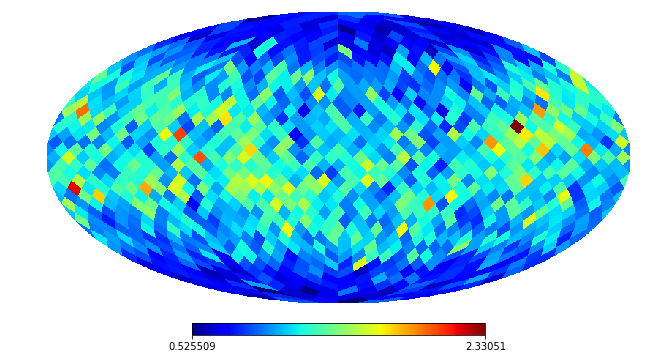

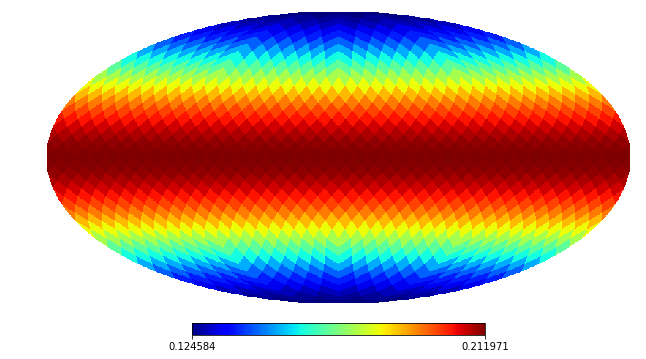

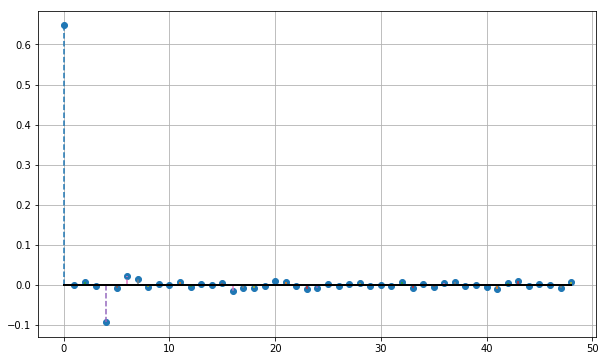

In [205]:
MMM_KEK = df_gh_srz['parallax_difference'].sum()/len(df_gh_srz['parallax_difference'])
DDD_KEK = np.sqrt(sum([np.power(i-MMM_KEK,2) for i in df_gh_srz['parallax_difference']])/len(df_gh_srz['parallax_difference']))

get_sf_gr_lonlat(df_gh_srz,cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 2 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 3 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 4 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 5 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 6 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 7 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 8 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 9 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 10 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 15 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 20 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 25 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 30 * DDD_KEK],cintro_m0=False,arg_m0='',arg_y0='parallax_difference_abs')
#get_sf_gr_lonlat(df_gh_srz[np.abs(df_gh_srz['parallax_difference'] - MMM_KEK) > 3 * DDD_KEK],cintro_m0=True,arg_m0='parallax_difference_abs',arg_y0='parallax_difference_abs')



In [ ]:
list(['rtr','wer','rtr'])

In [25]:
%load_ext fortranmagic
# activating magic
%reload_ext fortranmagic


/home/p_a/anaconda3/lib/python3.6/site-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [39]:
%%fortran

module LSQ

IMPLICIT NONE

contains

	Subroutine LSQM(a,y,w, x,d, s, r)

! m - количество уравнений
! n - количество неизвестных
! a(m,n) - матрица плана
! y(m) - столбец правых частей,  w(m) -  столбец весов;
! x(n) - ответ, d(n) - среднеквадратичные ошибки x;
!  s - среднеквадратичная ошибка единицы веса;
!  r(n,n) - корреляционная матрица.

	real(8), intent(in)  :: a(:,:), y(:), w(:)
	real(8), intent(out) :: x(:), d(:), s, r(:,:)

	integer i,j,k
    real(8) :: u
    real(8) :: c(size(x))

	integer :: m,n

	m=size(a, dim=1)
	n=size(a, dim=2)

	if (size(y)/=m .or. size(w)/=m .or. size(x)/=n .or. size(d)/=n .or. size(r,dim=1)/=n .or. size(r,dim=2) /= n) then
	 STOP 'Incorrect parameters of LSQM'
	endif

      do i=1,n

       do j=1,i
        u=0.0_8
        do k=1,m
	     u=u+a(k,i)*a(k,j)*w(k)
	    end do
        r(i,j)=u; r(j,i)=u
       end do

	   u=0.0_8
       do k=1,m
        u=u+a(k,i)*y(k)*w(k)
       end do
       c(i)=u

	  end do ! i=1,n

      call Invert(r)
      call Multiply(r,c,x)

      s=0.0_8
      do k=1,m
       u=0.0_8
	   do i=1,n
        u=u+a(k,i)*x(i)
	   enddo
       s=s+(u-y(k))**2 * w(k)
	  enddo
      s=sqrt(s/(m-n))

	  do i=1,n
       d(i)=s*sqrt(r(i,i))
	  enddo

      do i=1,n
       do j=1,i-1
          r(i,j)=r(i,j)/sqrt(r(i,i)*r(j,j))
          r(j,i)=r(i,j)
       enddo
	  enddo
      do i=1,n
       r(i,i)=1.0_8
	  enddo
	
	end subroutine

     Subroutine Multiply(a,b,c)
! Умножение матрицы на вектор c[m]:=a[m,n]*b[n]
	real(8), intent(in)  :: a(:,:),b(:)
	real(8), intent(out) :: c(:)
	integer m,n
	integer i,k
    real(8) :: t

    m=size(a,dim=1);	n=size(a,dim=2)
	if (size(b)/=n .or. size(c)/=m) then
	 STOP 'Incompatible size in Multiply'
	endif
      
      do i=1,m
       t=0.0
       do k=1,n
        t=t+a(i,k)*b(k)
       enddo
       c(i)=t
	enddo

	end subroutine


	Subroutine Invert(D) ! Обращение матрицы
	real(8), intent(inout) :: D(:,:)			 ! Исходная матрица	
	integer :: N2,i,j,k,is
	real(8) :: t
	real(8) a( size(D,dim=1), 2*size(D,dim=1) )
	integer :: N
	N=size(D,dim=1)
	N2=2*N

!		Наращивание с единичной матрицей
	
	DO i=1,N
	 DO j=1,N
	  a(i,j)=D(i,j)
	 END DO
	END DO
	DO i=1,N
	 DO j=1,N
	  IF (i==j) THEN
	            a(i,j+N)=1
			   ELSE
				a(i,j+N)=0
	  END IF
	 END DO
	END DO
!	Начало обращения
	DO i=1,N
	 k=i
	 DO WHILE (a(k,i)==0)
	  is=1
	  IF (k<N) THEN
	              K=K+1
			   ELSE	
				STOP 'Matrix is particular'	
	  ENDIF
	 END DO ! WHILE

	 IF (is==1) THEN
	  t=a(i,j)
	  a(k,j)=a(i,j)
	  a(i,j)=t
	 ENDIF

	 DO j=N2,i,-1
	  a(i,j)=a(i,j)/a(i,i)
	 ENDDO

	 DO k=1,N
	  IF (k /= i) THEN
	   DO j=N2,i,-1
	     a(k,j)=a(k,j)-a(i,j)*a(k,i)
	   ENDDO
	  ENDIF
	 ENDDO

	ENDDO
	
	DO i=1,N
	 DO j=1,N
	  D(i,j)=a(i,j+N)
	 ENDDO
	ENDDO

  	END Subroutine
  	
  	
 REAL(4) Function Ranorm(s)
 REAL(4), INTENT(IN) :: S
 REAL(4) :: a,x 
 INTEGER(4) :: i 
  a=0
  DO I=1, 12 
   !CALL RANDOM(x)
   CALL RANDOM_NUMBER(X)
   a=a+x
  END DO 
  Ranorm=(a-6.0)*s
 END FUNCTION RANORM

 	  
SUBROUTINE INVMATRIX(A)

      IMPLICIT NONE
      REAL*8    :: A(:,:)
      INTEGER   :: MMM
      REAL*8                :: C0,C1,SIGMA
      INTEGER               :: I,J,K,M,METHOD,N1,N2
      INTEGER               :: LLL

      Real*8, Allocatable   :: WK(:,:), BK(:,:), E(:,:), U(:,:)
      Real*8, Allocatable   :: VM(:),WM(:)

      MMM=size(A,Dim=1)

!  MMM=size(WK,Dim=1)         ! MMM is the number of rows
!  LLL=size(WK,Dim=2)         ! LLL is the number of columns


      N1=MMM
      LLL=2*MMM
      N2=LLL	    
      Allocate( WK(N1,N2), BK(N1,N2),E(N1,N1),U(N1,N1) ) 
      Allocate( VM(N1), WM(N1) )

      DO I=1,MMM
        DO J=1,MMM
          E(I,J)=0.0D+00
        ENDDO
        E(I,I)=1.0D+00
      ENDDO
 
      DO I=1,MMM
        DO J=1,MMM
          WK(I,J)=A(I,J)
          WK(I,J+MMM)=E(I,J)
        ENDDO
      ENDDO
 

      DO 1000 M=1,MMM-1

        METHOD=1
        DO I=M+1,MMM
          IF (WK(I,M).NE.0.0D+00) METHOD=0
        ENDDO
        IF (METHOD.EQ.1) THEN
          C0=WK(M,M)
          DO I=M,LLL
            WK(M,I)=WK(M,I)/C0
          ENDDO
          GOTO 1000
        ELSE
          DO I=1,MMM
            VM(I)=0.0D+00
          ENDDO
          DO I=M,MMM
            VM(I)=WK(I,M)
          ENDDO
          C0=0.0D+00
          DO I=M,MMM
            C0=C0+VM(I)*VM(I)
          ENDDO
          IF (VM(M).GE.0.0D+00) THEN
            SIGMA=DSQRT(C0)
          ELSE
            SIGMA=-DSQRT(C0)
          END IF
          DO I=1,MMM
            WM(I)=VM(I)
          ENDDO
          WM(M)=WM(M)+SIGMA
          C0=0.0D+00
          DO I=M,MMM
            C0=C0+WM(I)*WM(I)
          ENDDO
          C1=DSQRT(C0)
          DO I=M,MMM
            WM(I)=WM(I)/C1
          ENDDO
          DO I=1,MMM
            DO J=1,MMM
              U(I,J)=E(I,J)-2.0D+00*WM(I)*WM(J)
            ENDDO
          ENDDO
          DO I=1,MMM
            DO J=1,LLL
              C0=0.0D+00
              DO K=1,MMM
                C0=C0+U(I,K)*WK(K,J)
              ENDDO
              BK(I,J)=C0
            ENDDO
          ENDDO
          DO I=1,MMM
            DO J=1,LLL
              WK(I,J)=BK(I,J)
            ENDDO
          ENDDO
          C0=WK(M,M)
          DO I=M,LLL
            WK(M,I)=WK(M,I)/C0
          ENDDO
        END IF
1000  CONTINUE

      C0=WK(MMM,MMM)
      DO I=MMM,LLL
        WK(MMM,I)=WK(MMM,I)/C0
      ENDDO


      DO K=MMM,2,-1
        DO I=K-1,1,-1
          C0=WK(I,K)
          DO J=K,LLL
            WK(I,J)=WK(I,J)-WK(K,J)*C0
          ENDDO
        ENDDO
      ENDDO  		    


      DO I=1,MMM
        DO J=1,MMM
          A(I,J)=WK(I,J+MMM)
        ENDDO
      ENDDO
 

      DEAllocate( WK, BK,E,U ) 
      DEAllocate( VM, WM )
 

END SUBROUTINE INVMATRIX


REAL(8) FUNCTION DETERMINANT(A)
REAL(8),INTENT(IN)    :: A(:,:)
INTEGER(4)   :: N
REAL(8)    :: DET
REAL*8               :: T,D,MAX
REAL*8               :: B(size(A,Dim=1),size(A,Dim=1))
INTEGER              :: I,J,K

N=size(A,Dim=1)

DO I=1,N
  DO J=1,N
    B(I,J)=A(I,J)
  ENDDO
ENDDO

D=1.0D+00

DO K=1,N
  MAX=0.0D+00
  DO I=K,N
    T=B(I,K)
    IF (DABS(T).GT.DABS(MAX)) THEN
      MAX=T
      J=I
    END IF
  END DO
  IF (MAX.EQ.0.0D+00) THEN
    D=0.0D+00
    GOTO 100
  END IF
  IF (J.NE.K) THEN
    D=-D
    DO I=K,N
      T=B(J,I)
      B(J,I)=B(K,I)
      B(K,I)=T
    END DO
  END IF
  DO I=K+1,N
    T=B(I,K)/MAX
    DO J=K+1,N
      B(I,J)=B(I,J)-T*B(K,J)
    END DO
  END DO
  D=D*B(K,K)
END DO

100 DET=D

DETERMINANT=DET

END FUNCTION DETERMINANT

 	

end module LSQ


In [58]:

print(lsq.lsqm([1,2],[1,2],[1,1]))

ValueError: failed to create intent(cache|hide)|optional array-- must have defined dimensions but got (-1,)

In [19]:
!f2py Lsq.f90 -m Lsq2 -h Lsq.py


Signature file "./Lsq.py" exists!!! Use --overwrite-signature to overwrite.


In [20]:
import f2py2e

ModuleNotFoundError: No module named 'f2py2e'

In [21]:
!ls


d2018.ipynb			   hammer_l_b.png     Lsq.f90
d2018_sf.ipynb			   hammer_ra_dec.png  Lsq.py
df_first_75_max_diff_parallax.csv  latex	      lurs-presentation.pdf
df_tgas_hip_srez.csv		   latexpp	      statistik_0.csv
hammer_ecl_lon_ecl_lat.png	   lib		      Untitled.ipynb


In [22]:
# %load Lsq.py
!    -*- f90 -*-
! Note: the context of this file is case sensitive.

python module Lsq2 ! in 
    interface  ! in :Lsq2
        module lsq ! in :Lsq2:Lsq.f90
            subroutine lsqm(a,y,w,x,d,s,r) ! in :Lsq2:Lsq.f90:lsq
                real(kind=8) dimension(:,:),intent(in) :: a
                real(kind=8) dimension(:),intent(in) :: y
                real(kind=8) dimension(:),intent(in) :: w
                real(kind=8) dimension(:),intent(out) :: x
                real(kind=8) dimension(:),intent(out) :: d
                real(kind=8) intent(out) :: s
                real(kind=8) dimension(:,:),intent(out) :: r
            end subroutine lsqm
            subroutine multiply(a,b,c) ! in :Lsq2:Lsq.f90:lsq
                real(kind=8) dimension(:,:),intent(in) :: a
                real(kind=8) dimension(:),intent(in) :: b
                real(kind=8) dimension(:),intent(out) :: c
            end subroutine multiply
            subroutine invert(d) ! in :Lsq2:Lsq.f90:lsq
                real(kind=8) dimension(:,:),intent(inout) :: d
            end subroutine invert
            function ranorm(s) ! in :Lsq2:Lsq.f90:lsq
                real(kind=4) intent(in) :: s
                real(kind=4) :: ranorm
            end function ranorm
            subroutine invmatrix(a) ! in :Lsq2:Lsq.f90:lsq
                real*8 dimension(:,:) :: a
            end subroutine invmatrix
            function determinant(a) ! in :Lsq2:Lsq.f90:lsq
                real(kind=8) dimension(:,:),intent(in) :: a
                real(kind=8) :: determinant
            end function determinant
        end module lsq
    end interface 
end python module Lsq2

! This file was auto-generated with f2py (version:2).
! See http://cens.ioc.ee/projects/f2py2e/


SyntaxError: invalid syntax (<ipython-input-22-26a8aa7d337f>, line 5)

In [23]:
import Lsq
print(Lsq2.__doc__)
print(Lsq.foo.__doc__)
hello.foo(4)


SyntaxError: invalid syntax (Lsq.py, line 4)

In [51]:
sf_hp = np.random.random?

In [78]:
sf_hp = np.random.random_sample((nside_a_n,))

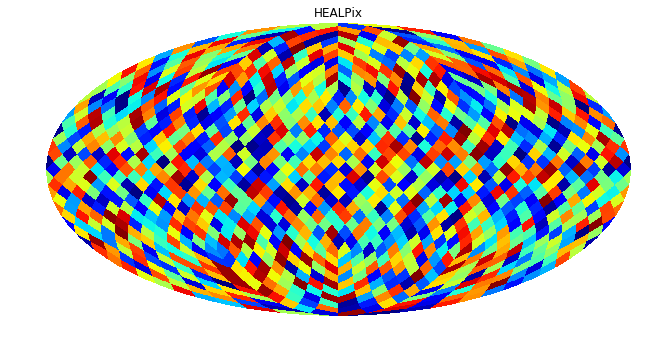

In [79]:
hp.mollview(sf_hp,title = 'HEALPix',unit='',xsize = 1800,cmap='jet',cbar=False)

In [71]:



NSIDE = 10
sfet_f_n = 49
nside_a_n = NSIDE**2 * 12


n_array_nside = np.arange(hp.nside2npix(NSIDE))

############################################################
##########           vizualization sf
############################################################

def madj(Z):
    M = sum(Z)/len(Z)
    M
    d0 = .0
    for i in Z:
        d0 += np.power((i - M),2)
    return np.sqrt(d0/len(Z)),M

#madj(X0[0]),madj(X1[0]),madj(X2[0][1:])
#X0[1]/nside_a_n,X1[1]/nside_a_n,X2[1]/nside_a_n,


def mapp(Zmap):
    kmapp_0 = np.zeros(nside_a_n)
    for i in [n_array_nside]:
        lib, lil  = list(hp.pix2ang(NSIDE, i))
        for j in np.arange(sfet_f_n):
            kmapp_0[i] += Zmap[j] * FVJ(j, lil,lib)
    return kmapp_0


def mappj(j):
    nsidesub = 72
    nside_a_n_sub = nsidesub**2*12
    kmapp_0 = np.zeros(nside_a_n_sub)
    for i in np.arange(nside_a_n_sub):
        lib, lil  = list(hp.pix2ang(nsidesub, i))
        kmapp_0[i] = FVJ(j, lil,lib)
    return kmapp_0

def mappj_val0(j):
    lib, lil  = list(hp.pix2ang(NSIDE, int(nside_a_n/2)))
    return FVJ(j, lil,lib)

def print_sf(n):
    for j_sf in np.arange(0,n):
        indexsej0,indexsej1,indexsej2 = INDEXES(j_sf)
        titles =  'j='+str(j_sf) + ' (n={}, k={}, l={})'.format(indexsej0,indexsej1,indexsej2)
        mapppj = mappj(j_sf)

        hp.mollview(mapppj,title =titles,unit='',xsize = 150,cmap='jet')
        plt.savefig('latex/img/moll_nside_{}.png'.format(j_sf), dpi=150)
        

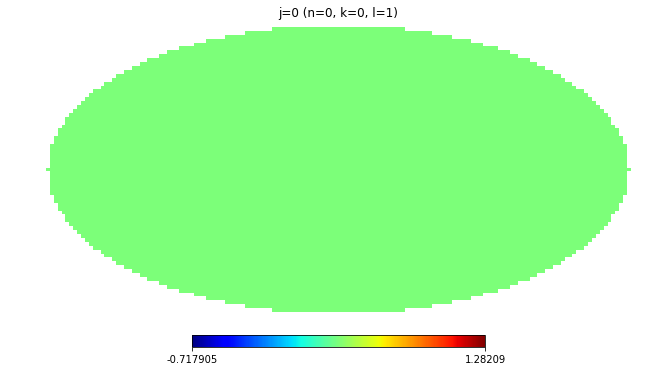

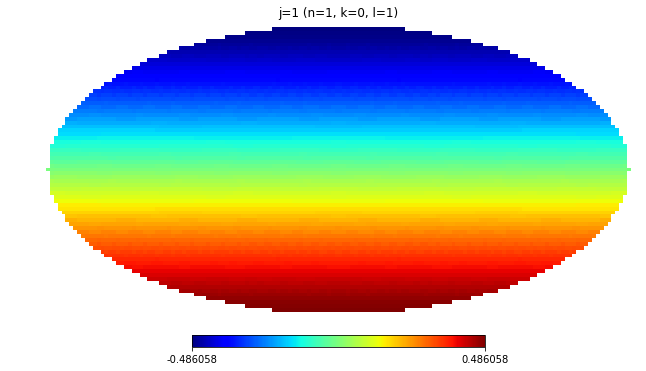

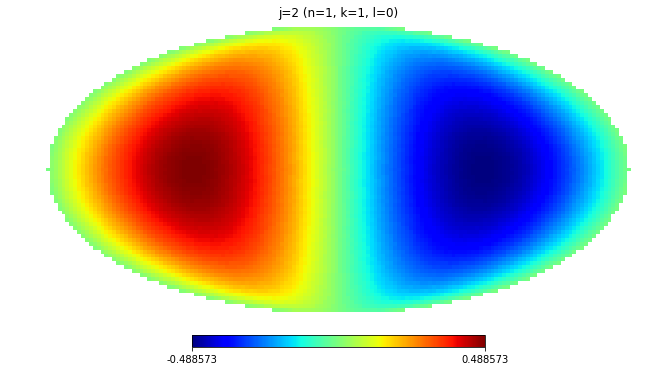

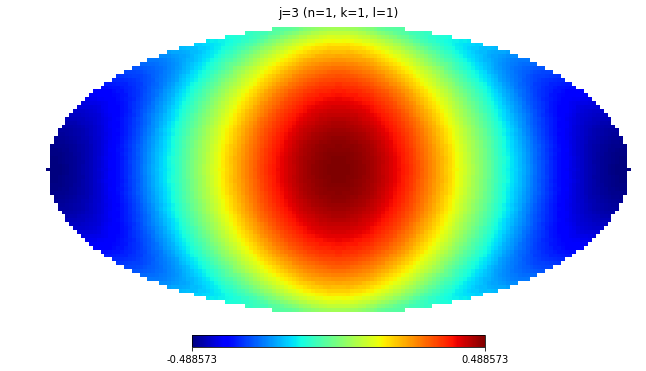

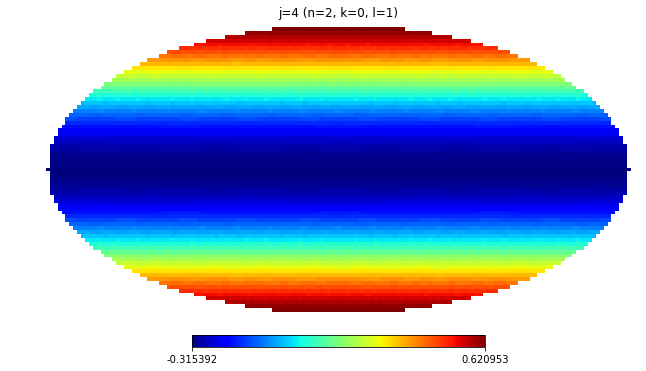

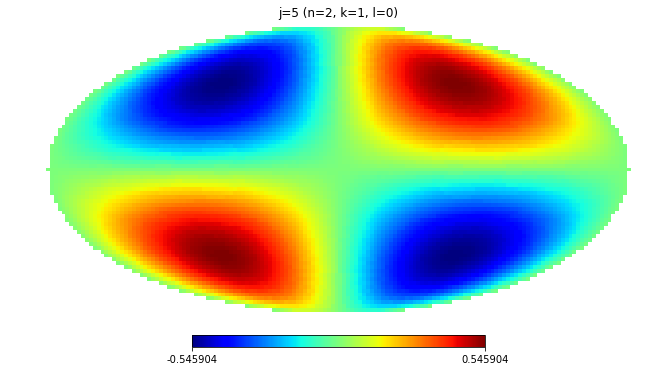

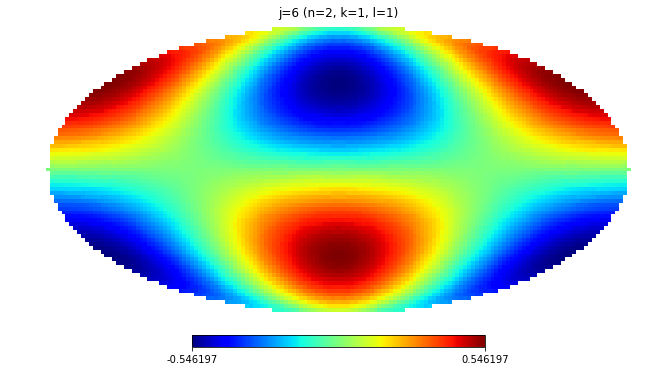

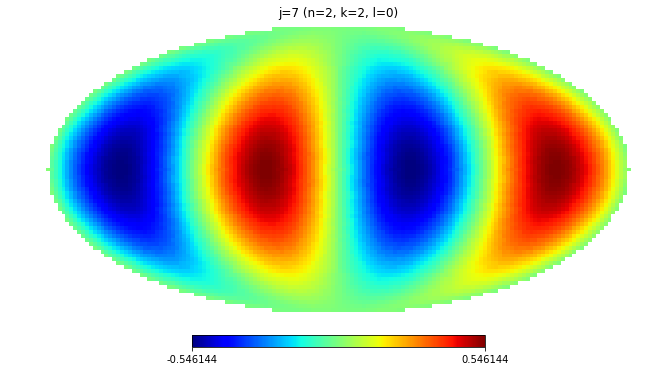

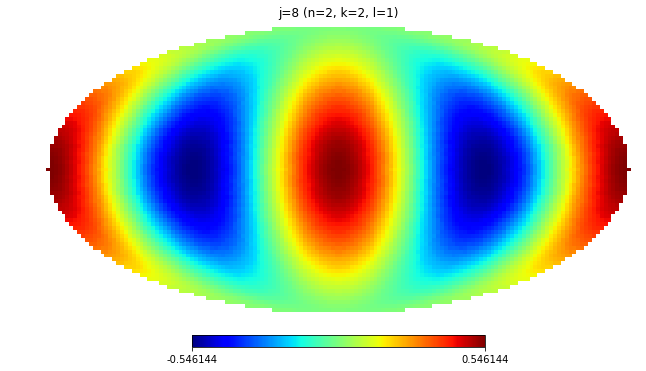

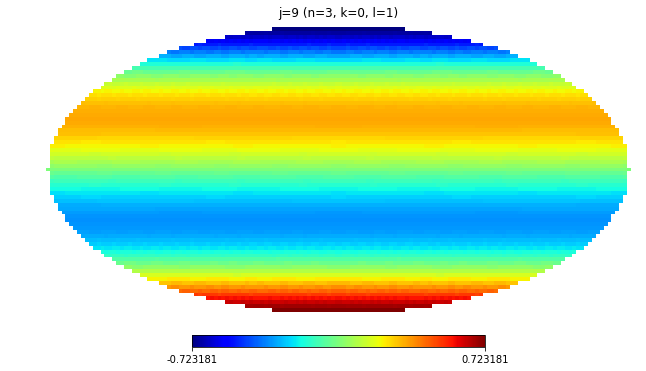

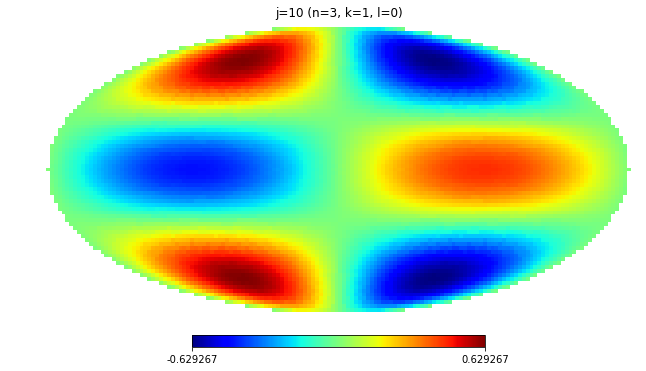

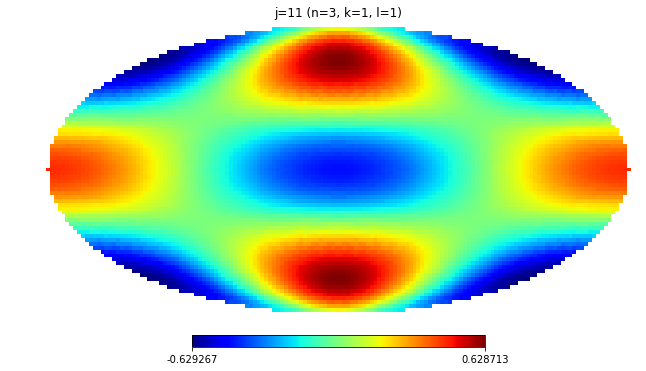

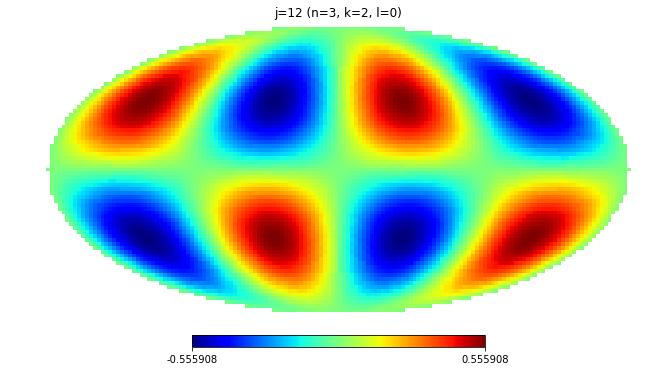

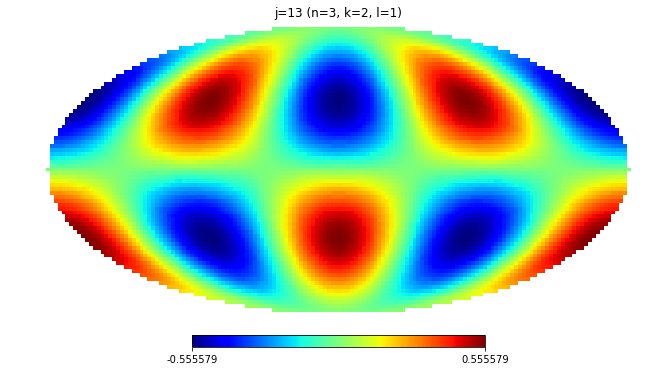

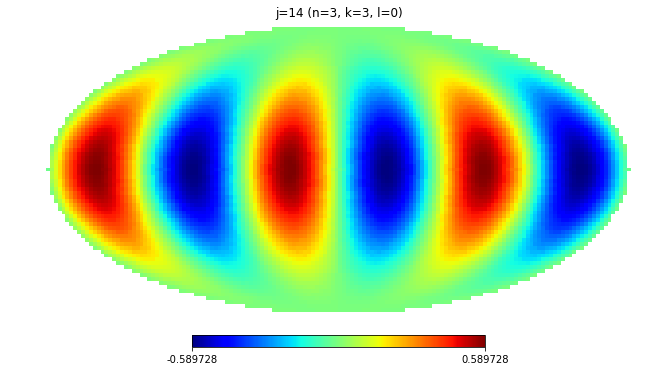

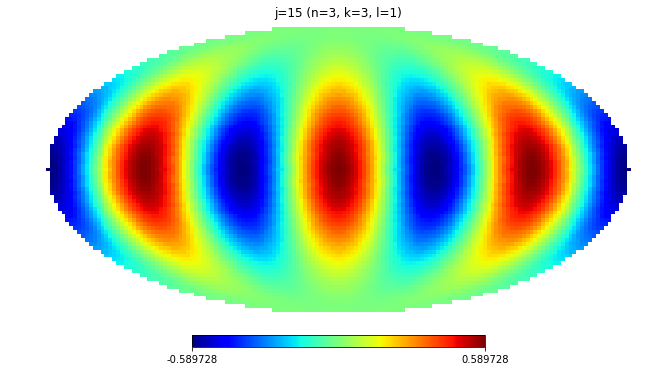

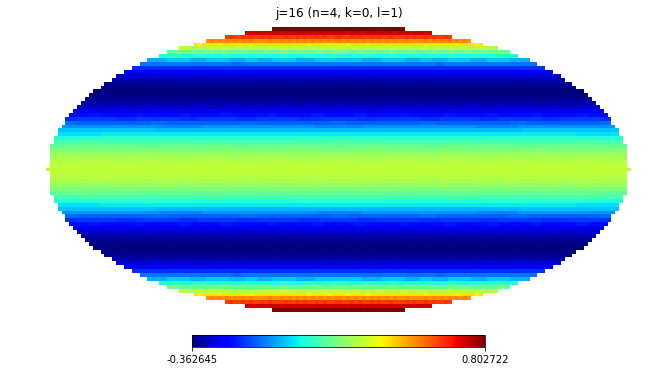

In [72]:
print_sf(17)